# data loading and cleaning

In [1]:
import numpy as np
import pandas as pd
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler as mms
from sklearn.linear_model import LogisticRegression
import graphviz
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
import os
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler as mms
from sklearn.ensemble import BaggingClassifier
from sklearn.utils import resample
import researchpy as rp





C:\Users\leona\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\leona\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\leona\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module

In [2]:
#https://www.kaggle.com/davidrgp/pokedex  ----> dataset pokemon_evolution
#https://www.kaggle.com/rounakbanik/pokemon -----> dataset pokemon csv

In [3]:
df = pd.read_csv('pokemon.csv', ) #main dataset
df2= pd.read_csv('pokemon_evolution.csv') # second dataset used to create evolution feature


In [4]:
df # let's see how's the data

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [5]:
df.columns.values # let's see all the columns

array(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight',
       'against_fire', 'against_flying', 'against_ghost', 'against_grass',
       'against_ground', 'against_ice', 'against_normal',
       'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'classfication',
       'defense', 'experience_growth', 'height_m', 'hp', 'japanese_name',
       'name', 'percentage_male', 'pokedex_number', 'sp_attack',
       'sp_defense', 'speed', 'type1', 'type2', 'weight_kg', 'generation',
       'is_legendary'], dtype=object)

I start by deleting 3 columns that I'm certain that are not useful for Machine Learning, there are also other columns like pokedex_number and generation but I will need them to handle data and create other feature I will so delete them later

In [6]:
# I delete japanese_name, classification and abilities beacuse I dont need them for Machine learning
pk_df=df.drop(df.columns[1:19],axis=1)
pk_df.drop(['japanese_name','classfication','abilities'],axis=1,inplace=True) 
pk_df.columns.values 
# spiegare perche non ci servono

array(['attack', 'base_egg_steps', 'base_happiness', 'base_total',
       'capture_rate', 'defense', 'experience_growth', 'height_m', 'hp',
       'name', 'percentage_male', 'pokedex_number', 'sp_attack',
       'sp_defense', 'speed', 'type1', 'type2', 'weight_kg', 'generation',
       'is_legendary'], dtype=object)

I will now deal with capture_rate, height, weight and type2 columns. They each have different problems that I have to check and clean

1. Height and Wheight cleaning

In [7]:
# here I notice that : capture_rate is object, height weight and type 2 have NaN values
pk_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 20 columns):
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness       801 non-null int64
base_total           801 non-null int64
capture_rate         801 non-null object
defense              801 non-null int64
experience_growth    801 non-null int64
height_m             781 non-null float64
hp                   801 non-null int64
name                 801 non-null object
percentage_male      703 non-null float64
pokedex_number       801 non-null int64
sp_attack            801 non-null int64
sp_defense           801 non-null int64
speed                801 non-null int64
type1                801 non-null object
type2                417 non-null object
weight_kg            781 non-null float64
generation           801 non-null int64
is_legendary         801 non-null int64
dtypes: float64(3), int64(13), object(4)
memory usage: 125.3+ KB


In [8]:
pk_df.isnull().sum() # ok so here i notice that height and weight have both 20 nan values, 
# so now i check if they are the same 

attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
defense                0
experience_growth      0
height_m              20
hp                     0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0
is_legendary           0
dtype: int64

In [9]:
pk_df[pk_df['weight_kg'].isnull()]# pokemon without weight

,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
18,56,3840,70,253,255,35,1000000,NaN,30,Rattata,50.0,19,25,35,72,normal,dark,NaN,1,0
19,71,3840,70,413,127,70,1000000,NaN,75,Raticate,50.0,20,40,80,77,normal,dark,NaN,1,0
25,85,2560,70,485,75,50,1000000,NaN,60,Raichu,50.0,26,95,85,110,electric,electric,NaN,1,0
26,75,5120,70,300,255,90,1000000,NaN,50,Sandshrew,50.0,27,10,35,40,ground,ice,NaN,1,0
27,100,5120,70,450,90,120,1000000,NaN,75,Sandslash,50.0,28,25,65,65,ground,ice,NaN,1,0
36,41,5120,70,299,190,40,1000000,NaN,38,Vulpix,24.6,37,50,65,65,fire,ice,NaN,1,0
37,67,5120,70,505,75,75,1000000,NaN,73,Ninetales,24.6,38,81,100,109,fire,ice,NaN,1,0
49,55,5120,70,265,255,30,1000000,NaN,10,Diglett,50.0,50,35,45,90,ground,ground,NaN,1,0
50,100,5120,70,425,50,60,1000000,NaN,35,Dugtrio,50.0,51,50,70,110,ground,ground,NaN,1,0
51,35,5120,70,290,255,35,1000000,NaN,40,Meowth,50.0,52,50,40,90,normal,dark,NaN,1,0


In [10]:
pk_df[pk_df['height_m'].isnull()]# pokemon without height

,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
18,56,3840,70,253,255,35,1000000,NaN,30,Rattata,50.0,19,25,35,72,normal,dark,NaN,1,0
19,71,3840,70,413,127,70,1000000,NaN,75,Raticate,50.0,20,40,80,77,normal,dark,NaN,1,0
25,85,2560,70,485,75,50,1000000,NaN,60,Raichu,50.0,26,95,85,110,electric,electric,NaN,1,0
26,75,5120,70,300,255,90,1000000,NaN,50,Sandshrew,50.0,27,10,35,40,ground,ice,NaN,1,0
27,100,5120,70,450,90,120,1000000,NaN,75,Sandslash,50.0,28,25,65,65,ground,ice,NaN,1,0
36,41,5120,70,299,190,40,1000000,NaN,38,Vulpix,24.6,37,50,65,65,fire,ice,NaN,1,0
37,67,5120,70,505,75,75,1000000,NaN,73,Ninetales,24.6,38,81,100,109,fire,ice,NaN,1,0
49,55,5120,70,265,255,30,1000000,NaN,10,Diglett,50.0,50,35,45,90,ground,ground,NaN,1,0
50,100,5120,70,425,50,60,1000000,NaN,35,Dugtrio,50.0,51,50,70,110,ground,ground,NaN,1,0
51,35,5120,70,290,255,35,1000000,NaN,40,Meowth,50.0,52,50,40,90,normal,dark,NaN,1,0


In [11]:
no_w=pk_df[pk_df['weight_kg'].isnull()]
no_h=pk_df[pk_df['height_m'].isnull()]
print(no_w.index.values)
print(no_h.index.values) # we can clearly see that the same 20 pokemons do not have height and weight measure

[ 18  19  25  26  27  36  37  49  50  51  52  73  74  75  87  88 102 104
 719 744]
[ 18  19  25  26  27  36  37  49  50  51  52  73  74  75  87  88 102 104
 719 744]


In [12]:
# I compute the mean of the weights and heights of all pokemon and i substitute them to the NaN values
# I do this considering that I have to apply machine learning algorithms
# so to minimize the impact of this values on the overall dataset
mean_w=pk_df['weight_kg'].mean()
mean_h=pk_df['height_m'].mean() 

In [13]:
for i in range(no_w.shape[0]):
    pk_df.loc[no_w.index.values[i], 'weight_kg'] = mean_w 
    
for i in range(no_h.shape[0]):
    pk_df.loc[no_h.index.values[i], 'height_m'] = mean_h

In [14]:
pk_df.isnull().sum() # ok now let's deal with the NaN in the type 2 feature

attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
defense                0
experience_growth      0
height_m               0
hp                     0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg              0
generation             0
is_legendary           0
dtype: int64

2. type2 cleaning

In [15]:
pk_df['type2'].fillna('None', inplace=True)
pk_df.isnull().sum() 

attack                0
base_egg_steps        0
base_happiness        0
base_total            0
capture_rate          0
defense               0
experience_growth     0
height_m              0
hp                    0
name                  0
percentage_male      98
pokedex_number        0
sp_attack             0
sp_defense            0
speed                 0
type1                 0
type2                 0
weight_kg             0
generation            0
is_legendary          0
dtype: int64

3. capture_rate cleaning

In [16]:
# a pokemon as an error in the capture rate, I look for the position of that pokmon so to change the capture rate
for index, rate in enumerate(pk_df.capture_rate.values):
    if rate=="30 (Meteorite)255 (Core)": # look for the position of this string
        print(index) 
        break

773


In [17]:
pk_df.loc[773,'capture_rate']='255' # set the capture rate at 255
pk_df['capture_rate']=pk_df.capture_rate.apply(pd.to_numeric) # capture rate is expressed as string i change to integer
pk_df.capture_rate[773]

255

In [18]:
pk_df.info()
pk_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 20 columns):
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness       801 non-null int64
base_total           801 non-null int64
capture_rate         801 non-null int64
defense              801 non-null int64
experience_growth    801 non-null int64
height_m             801 non-null float64
hp                   801 non-null int64
name                 801 non-null object
percentage_male      703 non-null float64
pokedex_number       801 non-null int64
sp_attack            801 non-null int64
sp_defense           801 non-null int64
speed                801 non-null int64
type1                801 non-null object
type2                801 non-null object
weight_kg            801 non-null float64
generation           801 non-null int64
is_legendary         801 non-null int64
dtypes: float64(3), int64(14), object(3)
memory usage: 125.3+ KB


,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,49,5120,70,318,45,49,1059860,0.7,45,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,62,5120,70,405,45,63,1059860,1.0,60,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,100,5120,70,625,45,123,1059860,2.0,80,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,52,5120,70,309,45,43,1059860,0.6,39,Charmander,88.1,4,60,50,65,fire,None,8.5,1,0
4,64,5120,70,405,45,58,1059860,1.1,58,Charmeleon,88.1,5,80,65,80,fire,None,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,101,30720,0,570,25,103,1250000,9.2,97,Celesteela,NaN,797,107,101,61,steel,flying,999.9,7,1
797,181,30720,0,570,255,131,1250000,0.3,59,Kartana,NaN,798,59,31,109,grass,steel,0.1,7,1
798,101,30720,0,570,15,53,1250000,5.5,223,Guzzlord,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,107,30720,0,600,3,101,1250000,2.4,97,Necrozma,NaN,800,127,89,79,psychic,None,230.0,7,1


# feature creation for counting sex
the percentage_male feature provides the probability that a pokemon is male. Given that there also exists pokemon that do not have sex, the percentage_male columns has for this pokemon Nan values. I wanted to use this information for machine learning but the problem is that I cannot express the probability of a pokemon to be male if It does not have sex at all. 
I so opted for a simplier solution, just creating a feature that tells if a pokemon has or has not sex

In [19]:
pk_df['percentage_male'].fillna('None', inplace=True)
pk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 20 columns):
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness       801 non-null int64
base_total           801 non-null int64
capture_rate         801 non-null int64
defense              801 non-null int64
experience_growth    801 non-null int64
height_m             801 non-null float64
hp                   801 non-null int64
name                 801 non-null object
percentage_male      801 non-null object
pokedex_number       801 non-null int64
sp_attack            801 non-null int64
sp_defense           801 non-null int64
speed                801 non-null int64
type1                801 non-null object
type2                801 non-null object
weight_kg            801 non-null float64
generation           801 non-null int64
is_legendary         801 non-null int64
dtypes: float64(2), int64(14), object(4)
memory usage: 125.3+ KB


In [20]:
# I create a list that if a pokemon has sex is 1 if not is 0
sex=[]
for i in range(pk_df.shape[0]):
    if pk_df.loc[i,'percentage_male']== 'None':
        sex.append(0) 
    else: 
        sex.append(1) 

In [21]:
pk_df['it_has_sex']=sex


In [22]:
pk_df.drop(['percentage_male'], axis=1,inplace=True)


In [23]:
pk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 20 columns):
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness       801 non-null int64
base_total           801 non-null int64
capture_rate         801 non-null int64
defense              801 non-null int64
experience_growth    801 non-null int64
height_m             801 non-null float64
hp                   801 non-null int64
name                 801 non-null object
pokedex_number       801 non-null int64
sp_attack            801 non-null int64
sp_defense           801 non-null int64
speed                801 non-null int64
type1                801 non-null object
type2                801 non-null object
weight_kg            801 non-null float64
generation           801 non-null int64
is_legendary         801 non-null int64
it_has_sex           801 non-null int64
dtypes: float64(2), int64(15), object(3)
memory usage: 125.3+ KB


# managing the second dataset for creating the evolution feature
I also wanted to create a feature that considered the evolution stages of each pokemon. To do that I needed to import a second dataset that provided me with some data that considered the evolutions of pokemon. I first had to clean a bit the dataset and match it with the first one so to have an even dataframe to work with. After that I created a simple algorithm to create a feature that tells me at what evolution stage a pokemon is, for instance, stage 1, stage  2, stage 3.

In [24]:
## let's see upt to what generation the second dataset came to 
set(df2.generation_id.values) # up to generation 6

{nan,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan}

In [25]:
set(df.generation.values)# the first id up to generation 7

{1, 2, 3, 4, 5, 6, 7}

In [26]:
df2[df2['generation_id']==6] # pokemon in second dataframe belonging to the 6th gen. they go up to volcanion (index 720)

,id,pokemon,species_id,height,weight,base_experience,type_1,type_2,attack,defense,...,color_2,color_f,egg_group_1,egg_group_2,url_image,generation_id,evolves_from_species_id,evolution_chain_id,shape_id,shape
649,650,chespin,650,4,90,63,grass,NaN,61,65,...,NaN,NaN,ground,NaN,650.png,6.0,NaN,337.0,6.0,upright
650,651,quilladin,651,7,290,142,grass,NaN,78,95,...,NaN,NaN,ground,NaN,651.png,6.0,650.0,337.0,6.0,upright
651,652,chesnaught,652,16,900,239,grass,fighting,107,122,...,#C03028,#89A346,ground,NaN,652.png,6.0,651.0,337.0,6.0,upright
652,653,fennekin,653,4,94,61,fire,NaN,45,40,...,NaN,NaN,ground,NaN,653.png,6.0,NaN,338.0,8.0,quadruped
653,654,braixen,654,10,145,143,fire,NaN,59,58,...,NaN,NaN,ground,NaN,654.png,6.0,653.0,338.0,6.0,upright
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,717,yveltal,717,58,2030,306,dark,flying,131,95,...,#A890F0,#7D6570,no-eggs,NaN,717.png,6.0,NaN,369.0,9.0,wings
717,718,zygarde,718,50,3050,270,dragon,ground,100,121,...,#E0C068,#8B58D5,no-eggs,NaN,718.png,6.0,NaN,370.0,2.0,squiggle
718,719,diancie,719,7,88,270,rock,fairy,100,150,...,#EE99AC,#C59E54,no-eggs,NaN,NaN,6.0,NaN,371.0,4.0,arms
719,720,hoopa,720,5,90,270,psychic,ghost,110,60,...,#705898,#D7588B,no-eggs,NaN,NaN,6.0,NaN,372.0,1.0,ball


In [27]:
df2.loc[721:,'pokemon'].values # the pokeomn from index 721 are all special/ alternative forms, 
# for the sake of simplicity I will delete them

array(['deoxys-attack', 'deoxys-defense', 'deoxys-speed',
       'wormadam-sandy', 'wormadam-trash', 'shaymin-sky',
       'giratina-origin', 'rotom-heat', 'rotom-wash', 'rotom-frost',
       'rotom-fan', 'rotom-mow', 'castform-sunny', 'castform-rainy',
       'castform-snowy', 'basculin-blue-striped', 'darmanitan-zen',
       'meloetta-pirouette', 'tornadus-therian', 'thundurus-therian',
       'landorus-therian', 'kyurem-black', 'kyurem-white',
       'keldeo-resolute', 'meowstic-female', 'aegislash-blade',
       'pumpkaboo-small', 'pumpkaboo-large', 'pumpkaboo-super',
       'gourgeist-small', 'gourgeist-large', 'gourgeist-super',
       'venusaur-mega', 'charizard-mega-x', 'charizard-mega-y',
       'blastoise-mega', 'alakazam-mega', 'gengar-mega',
       'kangaskhan-mega', 'pinsir-mega', 'gyarados-mega',
       'aerodactyl-mega', 'mewtwo-mega-x', 'mewtwo-mega-y',
       'ampharos-mega', 'scizor-mega', 'heracross-mega', 'houndoom-mega',
       'tyranitar-mega', 'blaziken-mega', 'g

In [28]:
pk_df2=df2.drop(df2.index[721:],axis=0) # so i delete them
pk_df2.drop(pk_df2.columns[2:-3], axis=1,inplace=True) # here I also delete the columns that I do not need from the second dataset
pk_df2.drop(['shape_id','shape'], axis=1, inplace=True)

In [29]:
pk_df2

,id,pokemon,evolution_chain_id
0,1,bulbasaur,1.0
1,2,ivysaur,1.0
2,3,venusaur,1.0
3,4,charmander,2.0
4,5,charmeleon,2.0
...,...,...,...
716,717,yveltal,369.0
717,718,zygarde,370.0
718,719,diancie,371.0
719,720,hoopa,372.0


In [30]:
# Now I delete all the pokemon from volcanion in the first dataset so to match the two
pk_df.drop(pk_df.index[721:],axis=0,inplace=True)
pk_df

,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,name,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,it_has_sex
0,49,5120,70,318,45,49,1059860,0.700000,45,Bulbasaur,1,65,65,45,grass,poison,6.900000,1,0,1
1,62,5120,70,405,45,63,1059860,1.000000,60,Ivysaur,2,80,80,60,grass,poison,13.000000,1,0,1
2,100,5120,70,625,45,123,1059860,2.000000,80,Venusaur,3,122,120,80,grass,poison,100.000000,1,0,1
3,52,5120,70,309,45,43,1059860,0.600000,39,Charmander,4,60,50,65,fire,None,8.500000,1,0,1
4,64,5120,70,405,45,58,1059860,1.100000,58,Charmeleon,5,80,65,80,fire,None,19.000000,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,131,30720,0,680,45,95,1250000,5.800000,126,Yveltal,717,131,98,99,dark,flying,203.000000,6,1,0
717,100,30720,0,708,3,121,1250000,5.000000,216,Zygarde,718,91,95,85,dragon,ground,284.600000,6,1,0
718,160,6400,70,700,3,110,1250000,0.700000,50,Diancie,719,160,110,110,rock,fairy,8.800000,6,1,0
719,160,30720,100,680,3,60,1250000,1.163892,80,Hoopa,720,170,130,80,psychic,ghost,61.378105,6,1,0


In [31]:
# Now let's check if there are some mismatch between the two dataset, I will use the names to understand that
names1=pk_df.name 
for i in range(names1.shape[0]):
    names1[i]=names1[i].lower() 
    
    


C:\Users\leona\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [32]:
names2=pk_df2.pokemon 
mismatch_list=[] 
for i in range(names1.shape[0]):
    if names1[i]==names2[i]:
        continue
    else:
        mismatch_list.append(i)
for i in mismatch_list:
    print('nomi primo dataset|',names1[i],'---nomi secondo dataset|', names2[i])
    # given the results the pokemon are the same they are just named differently in the datasets
    #this means that i can freerly procceed with the creation of my evolution feature

nomi primo dataset| nidoran♀ ---nomi secondo dataset| nidoran-f
nomi primo dataset| nidoran♂ ---nomi secondo dataset| nidoran-m
nomi primo dataset| farfetch'd ---nomi secondo dataset| farfetchd
nomi primo dataset| mr. mime ---nomi secondo dataset| mr-mime
nomi primo dataset| deoxys ---nomi secondo dataset| deoxys-normal
nomi primo dataset| wormadam ---nomi secondo dataset| wormadam-plant
nomi primo dataset| mime jr. ---nomi secondo dataset| mime-jr
nomi primo dataset| giratina ---nomi secondo dataset| giratina-altered
nomi primo dataset| shaymin ---nomi secondo dataset| shaymin-land
nomi primo dataset| basculin ---nomi secondo dataset| basculin-red-striped
nomi primo dataset| darmanitan ---nomi secondo dataset| darmanitan-standard
nomi primo dataset| tornadus ---nomi secondo dataset| tornadus-incarnate
nomi primo dataset| thundurus ---nomi secondo dataset| thundurus-incarnate
nomi primo dataset| landorus ---nomi secondo dataset| landorus-incarnate
nomi primo dataset| keldeo ---nomi sec

here I'm creating a list that can contain 1, 2, 3 if the pokemon is respectively at his first, second or third evolution stage. This list will be the data that I will add to the dataframe under the name: 'evolution_stages'


In [33]:
# here i'm creating a list that can contain 1, 2, 3 if the pokemon is respectivvely at his first second or third evolution stage

evolution_lis=['']*721
for i in range(1,374): # there are 374 evolution chain id
    helper=pk_df2[pk_df2.evolution_chain_id==i]
    for c in range(helper.shape[0]): 
        evolution_lis[helper.iloc[c,0]-1]=c+1 
# to check i printed it and confronted with the evolution chain, in the list there are also number above 3
# this does not mean that there are pokemon with more than 3 evolution stages, but it accounts pokemons
# that have more than one evolution possibility, for istance if evee (id:133, index:132) can evolve in 
# multiple pokemons, it either evolves in flareon, joteon, vaporeon etc.
# given this outliers, I want to check how much of them there exists and see how can i deal with them
for i in range(len(evolution_lis)):
    print('df--',pk_df2.evolution_chain_id[i],'list--',evolution_lis[i])

df-- 1.0 list-- 1
df-- 1.0 list-- 2
df-- 1.0 list-- 3
df-- 2.0 list-- 1
df-- 2.0 list-- 2
df-- 2.0 list-- 3
df-- 3.0 list-- 1
df-- 3.0 list-- 2
df-- 3.0 list-- 3
df-- 4.0 list-- 1
df-- 4.0 list-- 2
df-- 4.0 list-- 3
df-- 5.0 list-- 1
df-- 5.0 list-- 2
df-- 5.0 list-- 3
df-- 6.0 list-- 1
df-- 6.0 list-- 2
df-- 6.0 list-- 3
df-- 7.0 list-- 1
df-- 7.0 list-- 2
df-- 8.0 list-- 1
df-- 8.0 list-- 2
df-- 9.0 list-- 1
df-- 9.0 list-- 2
df-- 10.0 list-- 1
df-- 10.0 list-- 2
df-- 11.0 list-- 1
df-- 11.0 list-- 2
df-- 12.0 list-- 1
df-- 12.0 list-- 2
df-- 12.0 list-- 3
df-- 13.0 list-- 1
df-- 13.0 list-- 2
df-- 13.0 list-- 3
df-- 14.0 list-- 1
df-- 14.0 list-- 2
df-- 15.0 list-- 1
df-- 15.0 list-- 2
df-- 16.0 list-- 1
df-- 16.0 list-- 2
df-- 17.0 list-- 1
df-- 17.0 list-- 2
df-- 18.0 list-- 1
df-- 18.0 list-- 2
df-- 18.0 list-- 3
df-- 19.0 list-- 1
df-- 19.0 list-- 2
df-- 20.0 list-- 1
df-- 20.0 list-- 2
df-- 21.0 list-- 1
df-- 21.0 list-- 2
df-- 22.0 list-- 1
df-- 22.0 list-- 2
df-- 23.0 list-- 

df-- 277.0 list-- 2
df-- 277.0 list-- 3
df-- 278.0 list-- 1
df-- 278.0 list-- 2
df-- 279.0 list-- 1
df-- 279.0 list-- 2
df-- 280.0 list-- 1
df-- 281.0 list-- 1
df-- 281.0 list-- 2
df-- 281.0 list-- 3
df-- 282.0 list-- 1
df-- 282.0 list-- 2
df-- 283.0 list-- 1
df-- 284.0 list-- 1
df-- 284.0 list-- 2
df-- 285.0 list-- 1
df-- 285.0 list-- 2
df-- 286.0 list-- 1
df-- 287.0 list-- 1
df-- 287.0 list-- 2
df-- 288.0 list-- 1
df-- 288.0 list-- 2
df-- 289.0 list-- 1
df-- 289.0 list-- 2
df-- 290.0 list-- 1
df-- 290.0 list-- 2
df-- 291.0 list-- 1
df-- 291.0 list-- 2
df-- 292.0 list-- 1
df-- 292.0 list-- 2
df-- 293.0 list-- 1
df-- 293.0 list-- 2
df-- 293.0 list-- 3
df-- 294.0 list-- 1
df-- 294.0 list-- 2
df-- 294.0 list-- 3
df-- 295.0 list-- 1
df-- 295.0 list-- 2
df-- 296.0 list-- 1
df-- 296.0 list-- 2
df-- 296.0 list-- 3
df-- 297.0 list-- 1
df-- 297.0 list-- 2
df-- 298.0 list-- 1
df-- 299.0 list-- 1
df-- 299.0 list-- 2
df-- 300.0 list-- 1
df-- 300.0 list-- 2
df-- 301.0 list-- 1
df-- 301.0 list-- 2


In [34]:
msk= [i>3 for i in evolution_lis] # i create a mask to see whos pokemon have been counted too much

print([evolution_lis[i] for i in range(len(evolution_lis)) if msk[i]]) 
to_del=[]
to_del=[i for i in range(len(evolution_lis)) if msk[i]]
print(to_del)


# they are not a lot of them, so i prefer to delete them for sake of simplicity

[4, 4, 4, 5, 6, 4, 4, 5, 7, 8, 4, 9]
[135, 181, 185, 195, 196, 236, 267, 268, 469, 470, 474, 699]


In [35]:
pk_df['evolution_stages']=evolution_lis ## i first add the list to create the feature to after drop the elemensts in to_del

In [36]:
for i in to_del:
    pk_df.drop(i,axis=0,inplace=True) # delete the elements
    

# preparing the data for the machine learning algorithms (dummies and removal of remaing feature not useful for ML)


In [37]:
pk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709 entries, 0 to 720
Data columns (total 21 columns):
attack               709 non-null int64
base_egg_steps       709 non-null int64
base_happiness       709 non-null int64
base_total           709 non-null int64
capture_rate         709 non-null int64
defense              709 non-null int64
experience_growth    709 non-null int64
height_m             709 non-null float64
hp                   709 non-null int64
name                 709 non-null object
pokedex_number       709 non-null int64
sp_attack            709 non-null int64
sp_defense           709 non-null int64
speed                709 non-null int64
type1                709 non-null object
type2                709 non-null object
weight_kg            709 non-null float64
generation           709 non-null int64
is_legendary         709 non-null int64
it_has_sex           709 non-null int64
evolution_stages     709 non-null int64
dtypes: float64(2), int64(16), object(3)
memory 

In [38]:
pk_df=pd.get_dummies(pk_df, columns=['evolution_stages'], prefix='stage', prefix_sep='_') #  dummies evolution feature


In [39]:
pk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709 entries, 0 to 720
Data columns (total 23 columns):
attack               709 non-null int64
base_egg_steps       709 non-null int64
base_happiness       709 non-null int64
base_total           709 non-null int64
capture_rate         709 non-null int64
defense              709 non-null int64
experience_growth    709 non-null int64
height_m             709 non-null float64
hp                   709 non-null int64
name                 709 non-null object
pokedex_number       709 non-null int64
sp_attack            709 non-null int64
sp_defense           709 non-null int64
speed                709 non-null int64
type1                709 non-null object
type2                709 non-null object
weight_kg            709 non-null float64
generation           709 non-null int64
is_legendary         709 non-null int64
it_has_sex           709 non-null int64
stage_1              709 non-null uint8
stage_2              709 non-null uint8
stage_3 

In [40]:
pk_df_no_dum=pk_df

In [41]:
pk_df=pd.get_dummies(pk_df, columns=['type2'], prefix='', prefix_sep='')


In [42]:
pk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709 entries, 0 to 720
Data columns (total 41 columns):
attack               709 non-null int64
base_egg_steps       709 non-null int64
base_happiness       709 non-null int64
base_total           709 non-null int64
capture_rate         709 non-null int64
defense              709 non-null int64
experience_growth    709 non-null int64
height_m             709 non-null float64
hp                   709 non-null int64
name                 709 non-null object
pokedex_number       709 non-null int64
sp_attack            709 non-null int64
sp_defense           709 non-null int64
speed                709 non-null int64
type1                709 non-null object
weight_kg            709 non-null float64
generation           709 non-null int64
is_legendary         709 non-null int64
it_has_sex           709 non-null int64
stage_1              709 non-null uint8
stage_2              709 non-null uint8
stage_3              709 non-null uint8
None     

In [43]:
for i in pk_df.index.values:
    pk_df.loc[i,pk_df.loc[i,'type1']] = 1
# given that pokemons can have 2 type, the dataframe has 2 columns: type1 and type2
# I use the get_dummy for just one column: type2, so that I can create also a dummy for None
# Therfore it will be like every pokemon has 2 type, pokemons that are monotype will have their type + the None type


In [44]:
pk_df.drop(['type1'], axis=1, inplace= True)


In [45]:
pk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709 entries, 0 to 720
Data columns (total 40 columns):
attack               709 non-null int64
base_egg_steps       709 non-null int64
base_happiness       709 non-null int64
base_total           709 non-null int64
capture_rate         709 non-null int64
defense              709 non-null int64
experience_growth    709 non-null int64
height_m             709 non-null float64
hp                   709 non-null int64
name                 709 non-null object
pokedex_number       709 non-null int64
sp_attack            709 non-null int64
sp_defense           709 non-null int64
speed                709 non-null int64
weight_kg            709 non-null float64
generation           709 non-null int64
is_legendary         709 non-null int64
it_has_sex           709 non-null int64
stage_1              709 non-null uint8
stage_2              709 non-null uint8
stage_3              709 non-null uint8
None                 709 non-null uint8
bug       

In [46]:
# now I can drop also generation, name and pokedex_number
pk_df.drop(['name','generation','pokedex_number'], axis=1, inplace=True)


In [47]:
pk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709 entries, 0 to 720
Data columns (total 37 columns):
attack               709 non-null int64
base_egg_steps       709 non-null int64
base_happiness       709 non-null int64
base_total           709 non-null int64
capture_rate         709 non-null int64
defense              709 non-null int64
experience_growth    709 non-null int64
height_m             709 non-null float64
hp                   709 non-null int64
sp_attack            709 non-null int64
sp_defense           709 non-null int64
speed                709 non-null int64
weight_kg            709 non-null float64
is_legendary         709 non-null int64
it_has_sex           709 non-null int64
stage_1              709 non-null uint8
stage_2              709 non-null uint8
stage_3              709 non-null uint8
None                 709 non-null uint8
bug                  709 non-null int64
dark                 709 non-null int64
dragon               709 non-null int64
electric   

In [48]:
for i in pk_df.columns.values:
    print(i)

attack
base_egg_steps
base_happiness
base_total
capture_rate
defense
experience_growth
height_m
hp
sp_attack
sp_defense
speed
weight_kg
is_legendary
it_has_sex
stage_1
stage_2
stage_3
None
bug
dark
dragon
electric
fairy
fighting
fire
flying
ghost
grass
ground
ice
normal
poison
psychic
rock
steel
water


# Exploratory Data Analysis

### distribution of the statistics

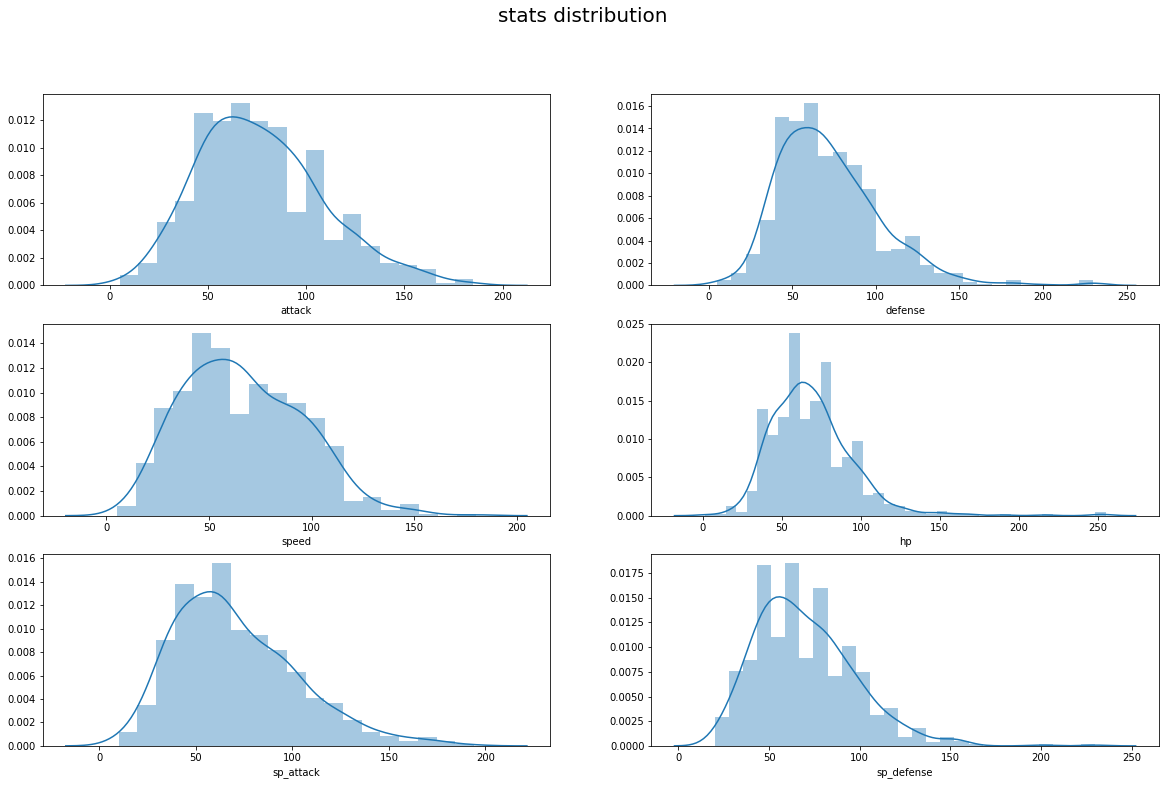

In [49]:
# let's see how all the statistics are distributed for all the pokemons
f, axes = plt.subplots(3,2, figsize=(20, 12))
f.suptitle("stats distribution", fontsize=20)
sns.distplot( pk_df["attack"], ax=axes[0,0])
sns.distplot( pk_df["defense"], ax=axes[0,1])
sns.distplot( pk_df["hp"], ax=axes[1,1])
sns.distplot( pk_df["speed"], ax=axes[1,0])
sns.distplot( pk_df["sp_defense"], ax=axes[2,1])
sns.distplot( pk_df["sp_attack"], ax=axes[2,0])


In [50]:
rp.summary_cont(pk_df['attack'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,attack,709.0,77.0071,32.0207,1.2026,74.646,79.3681


In [51]:
rp.summary_cont(pk_df['defense'])


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,defense,709.0,72.2412,30.906,1.1607,69.9624,74.52


In [52]:
rp.summary_cont(pk_df['speed'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,speed,709.0,66.5317,28.9866,1.0886,64.3944,68.669


In [53]:
rp.summary_cont(pk_df['hp'])


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,hp,709.0,68.7546,26.545,0.9969,66.7973,70.7119


In [54]:
rp.summary_cont(pk_df['sp_attack'])


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,sp_attack,709.0,70.7419,32.1317,1.2067,68.3727,73.1111


In [55]:
rp.summary_cont(pk_df['sp_defense'])


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,sp_defense,709.0,69.9337,27.5049,1.033,67.9057,71.9618


### distribution of the statistics for water type pokemons 

based on my experience water type pokemons are well balanced pokemons but tends to have higher hp or defense, I wanted to check this theory, I so compared the distribution of water type pokemons to all the other to see if there were some differences

In [56]:
water1=pk_df_no_dum[pk_df_no_dum["type1"] == "water"]
water2=pk_df_no_dum[pk_df_no_dum["type2"] == "water"]

In [57]:
water1.shape

(104, 23)

In [58]:

water_tot=pd.concat([water1,water2],axis=0,sort=True)

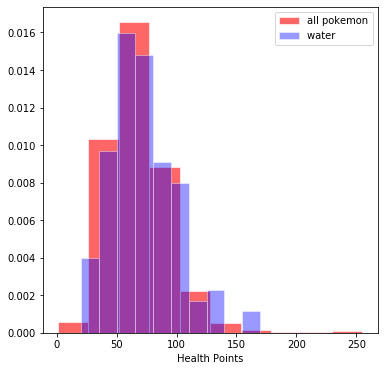

In [59]:
fig, ax = plt.subplots(figsize=(6,6))

ax.hist( pk_df.hp, color='red', edgecolor='white', alpha=0.6, density=True, label='all pokemon')
ax.hist( water_tot.hp, color='blue', edgecolor='white', alpha=0.4, density =True, label='water ')
ax.set_xlabel('Health Points')

ax.legend()


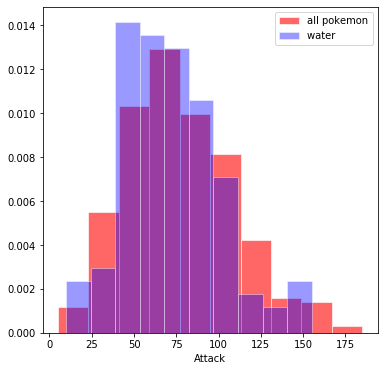

In [60]:
fig, ax = plt.subplots(figsize=(6,6))

ax.hist( pk_df.attack, color='red', edgecolor='white', alpha=0.6, density=True, label='all pokemon')
ax.hist( water_tot.attack, color='blue', edgecolor='white', alpha=0.4, density =True, label='water ')
ax.set_xlabel('Attack')

ax.legend()

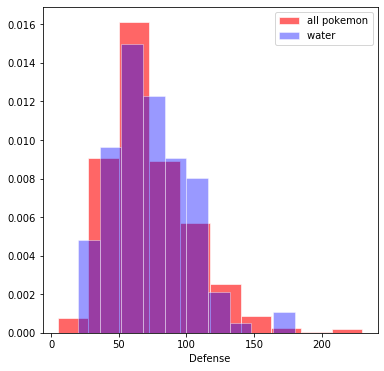

In [61]:
fig, ax = plt.subplots(figsize=(6,6))

ax.hist( pk_df.defense, color='red', edgecolor='white', alpha=0.6, density=True, label='all pokemon')
ax.hist( water_tot.defense, color='blue', edgecolor='white', alpha=0.4, density =True, label='water ')
ax.set_xlabel('Defense')

ax.legend()

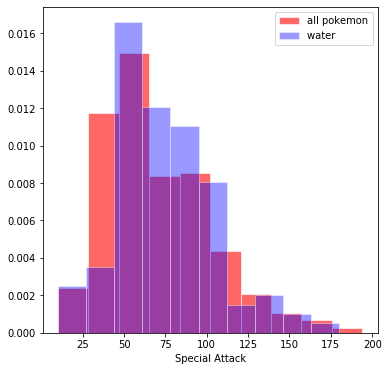

In [62]:
fig, ax = plt.subplots(figsize=(6,6))

ax.hist( pk_df.sp_attack, color='red', edgecolor='white', alpha=0.6, density=True, label='all pokemon')
ax.hist( water_tot.sp_attack, color='blue', edgecolor='white', alpha=0.4, density =True, label='water ')
ax.set_xlabel('Special Attack')

ax.legend()

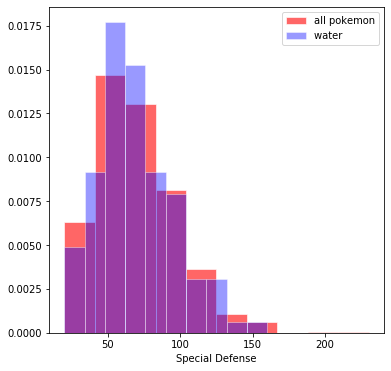

In [63]:
fig, ax = plt.subplots(figsize=(6,6))

ax.hist( pk_df.sp_defense, color='red', edgecolor='white', alpha=0.6, density=True, label='all pokemon')
ax.hist( water_tot.sp_defense, color='blue', edgecolor='white', alpha=0.4, density =True, label='water ')
ax.set_xlabel('Special Defense')

ax.legend()

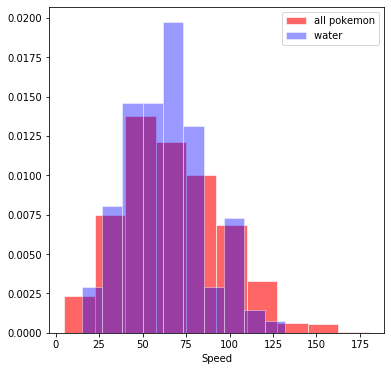

In [64]:
fig, ax = plt.subplots(figsize=(6,6))

ax.hist( pk_df.speed, color='red', edgecolor='white', alpha=0.6, density=True, label='all pokemon')
ax.hist( water_tot.speed, color='blue', edgecolor='white', alpha=0.4, density =True, label='water ')
ax.set_xlabel('Speed')

ax.legend()

The graphs clearly shows that there are not big differences between water type pokemons and the average pokemons, it seemd strange to me and to further understand this I made another distribution plot, this time for rock type pokemon (as I thought they should have high defense) and also create a correltation matrix to have a bigger picture of the correlation between statistics and typing 

#### rock type pokemons defense distribution

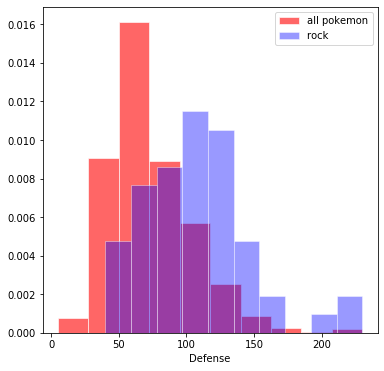

In [65]:
rock1=pk_df_no_dum[pk_df_no_dum["type1"] == "rock"]
rock2=pk_df_no_dum[pk_df_no_dum["type2"] == "rock"]
rock_tot=pd.concat([rock1,rock2],axis=0,sort=True)

fig, ax = plt.subplots(figsize=(6,6))

ax.hist( pk_df.defense, color='red', edgecolor='white', alpha=0.6, density=True, label='all pokemon')
ax.hist( rock_tot.defense, color='blue', edgecolor='white', alpha=0.4, density =True, label='rock ')
ax.set_xlabel('Defense')

ax.legend()

the graph shows that rock type pokemon tends to have higher defense compared to the average, my assumption was correct for them

## correlation matrix

In [66]:

water_dummies_val=list(pk_df.water)
pk_df.drop('water', axis=1, inplace=True)
pk_df.insert(18,'water',water_dummies_val)

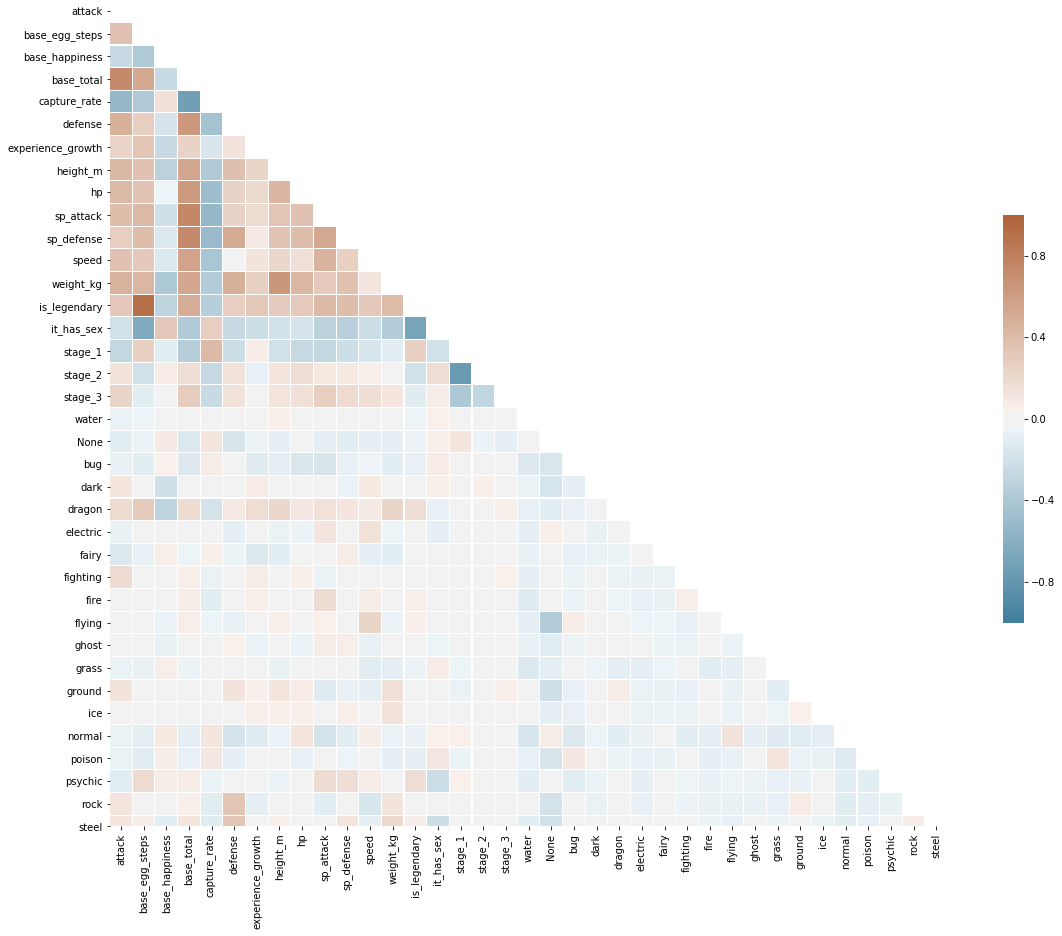

In [67]:
# Generate a mask for the upper triangle
corr=pk_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 30, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin= -1, center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": 0.5})

The matrix confirms that water type pokemons are in the average in terms of statistics as they do not have high correlation with any of them. We can so conclude that water is a well balanced typing. 

## How many water type pokemon we have

here I wanted to understand how many pokemon by type there exist

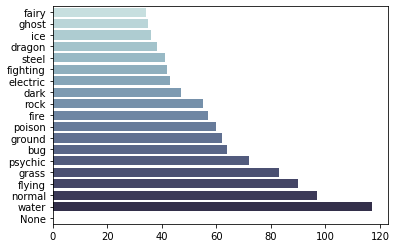

In [68]:
count2=pk_df_no_dum['type2'].value_counts()
count2.drop('None')
count_ser=pk_df_no_dum['type1'].value_counts() + count2
count_ser.sort_values(inplace=True)
sns.barplot( count_ser.values,count_ser.index, palette='ch:start=.2,rot=-.3' )

we see that the type water is the most copious compared to the others, let's see precisly how many of them we have

0    592
1    117
Name: water, dtype: int64


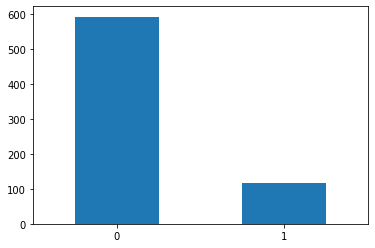

In [69]:
count_classes = pd.value_counts(pk_df['water'], sort = True)
print(count_classes)
count_classes.plot(kind = 'bar', rot=0)
## there are very few water compared to the other type, 
# when applying the machine learning algorithm we will so have to balance the datas

#  Machine Learning 
- Balancing
- Decision Tree - first try
- Random forest
- Feature selection
- Recursive feature elimination cross validation
- Decision tree - second try after feature selection
- Displaying Bias and Variance
- Decision tree - final try after Bagging
- Scaling
- Logistic regression
- KNN
- Support Vector Machine

In [70]:
y=pk_df['water']
#X=pk_df.drop(['is_legendary','capture_rate','base_egg_steps','it_has_sex','stage_1','base_total'],axis=1, )
X=pk_df.drop('water',axis=1, )


In [71]:
results = {} # a dictionary is created to store all the accuracies of the different predictions so that they can be compared at the end


## balancing


In [72]:
nm = NearMiss(random_state=42)
X_res,y_res=nm.fit_sample(X,y)


C:\Users\leona\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\leona\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\leona\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [73]:
y_res.shape # balanced, 234 so double the total amount of water type pokemon

(234,)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, 
                                                    test_size=0.2, 
                                                    random_state=42)

 ## Decision Tree - first try

In [75]:
# instead of splitting the dataset into train and validate, I used the cross-validation function cross_val_score in order
# to compute an even more accurate validation score, applying 5 different validations to the dataset
accuracies = []

for max_leaves in range(2,50,2): 
    cnt = (max_leaves//2)-1
    # train and predict
    dt = DecisionTreeClassifier(max_leaf_nodes=max_leaves)


    # compute Accuracy

    cross_valid_acc = np.mean(cross_val_score(dt,X_train,y_train, cv=5))


    accuracies +=[[cross_valid_acc, max_leaves]]
    
    print ("Leaves:",max_leaves," - Cross-Validation Accuracy: ",accuracies[cnt][0])
print()

#print(accuracies)
best_accuracy, best_max_leaves = max(accuracies)
print ( "Best Max Leaves", best_max_leaves )

# here we are using both training and validation,
# to exploit the most quantity of data
dt = DecisionTreeClassifier(max_leaf_nodes=best_max_leaves)
dt.fit(X_train,y_train)

# evaluate on test
y_prediction_trees=dt.predict(X_test)
test_acc = accuracy_score(y_true=y_test, y_pred=y_prediction_trees)
print ("Test Accuracy: {:.3f}".format(test_acc) )

Leaves: 2  - Cross-Validation Accuracy:  0.5994310099573257
Leaves: 4  - Cross-Validation Accuracy:  0.7007112375533429
Leaves: 6  - Cross-Validation Accuracy:  0.7972972972972973
Leaves: 8  - Cross-Validation Accuracy:  0.861877667140825
Leaves: 10  - Cross-Validation Accuracy:  0.8240398293029874
Leaves: 12  - Cross-Validation Accuracy:  0.8398293029871977
Leaves: 14  - Cross-Validation Accuracy:  0.8610241820768136
Leaves: 16  - Cross-Validation Accuracy:  0.8238975817923186
Leaves: 18  - Cross-Validation Accuracy:  0.8560455192034139
Leaves: 20  - Cross-Validation Accuracy:  0.8607396870554764
Leaves: 22  - Cross-Validation Accuracy:  0.8610241820768136
Leaves: 24  - Cross-Validation Accuracy:  0.8557610241820768
Leaves: 26  - Cross-Validation Accuracy:  0.8398293029871977
Leaves: 28  - Cross-Validation Accuracy:  0.8503556187766714
Leaves: 30  - Cross-Validation Accuracy:  0.8605974395448079
Leaves: 32  - Cross-Validation Accuracy:  0.8446657183499289
Leaves: 34  - Cross-Validatio

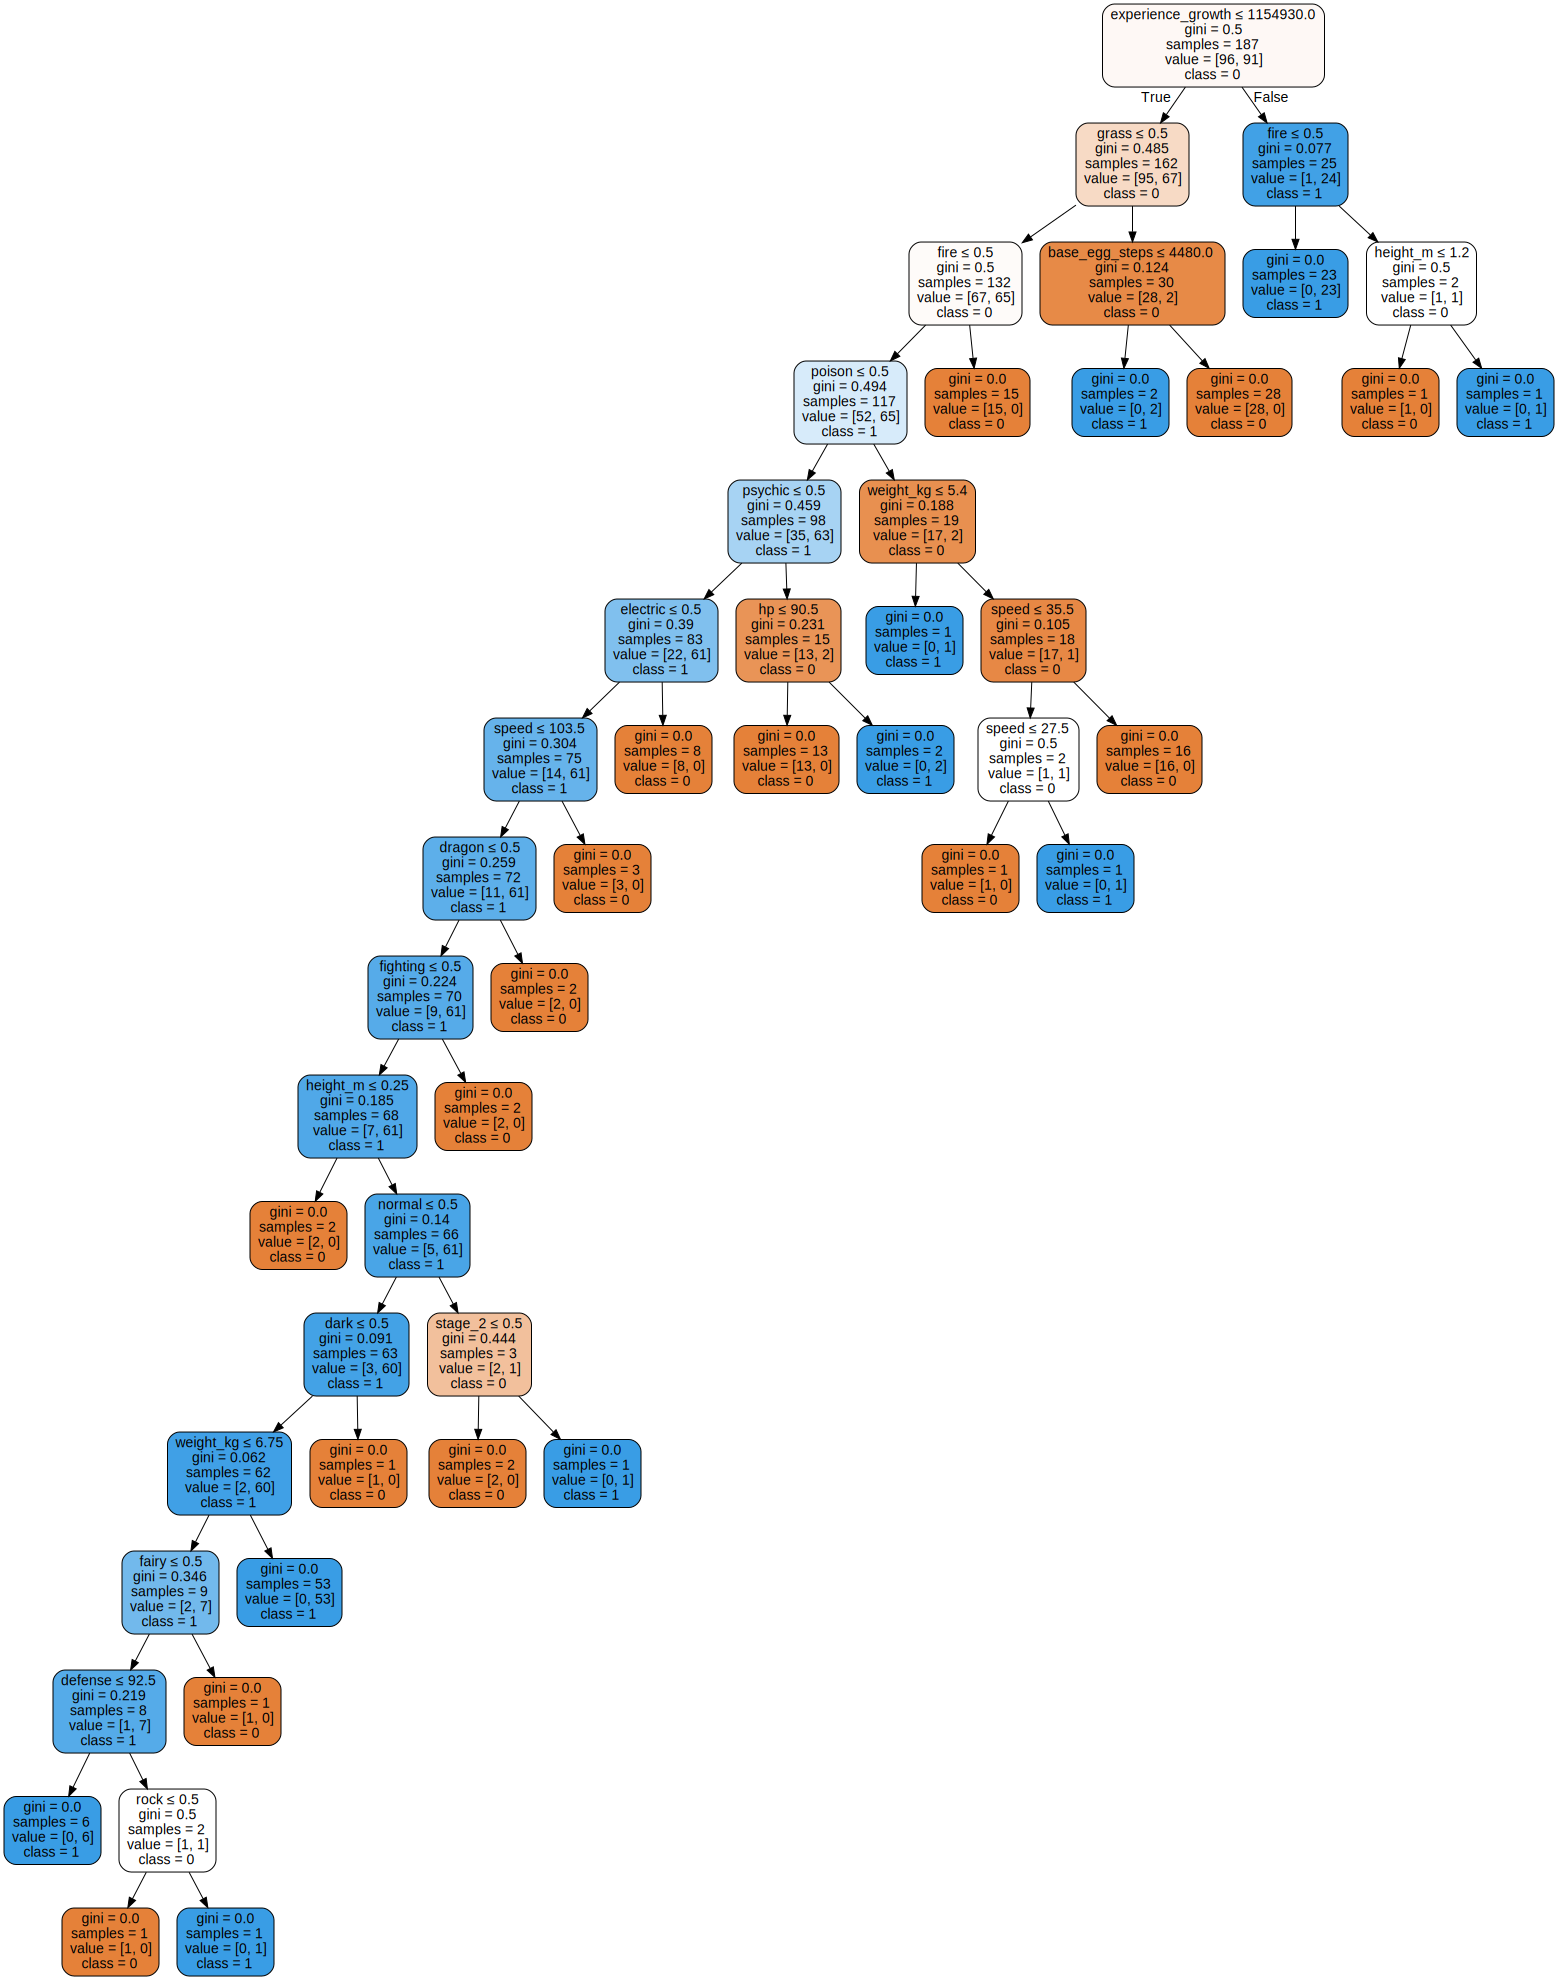

In [76]:
# GRAPHIC REPRESENTATION OF THE TREE

feat_names = X.columns

c_names = ["0","1"]

dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=feat_names, class_names=c_names,  
                                filled=True, rounded=True, special_characters=True)  



graph = graphviz.Source(dot_data)
graph

In [77]:
print(classification_report(y_test,y_prediction_trees))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        21
           1       0.84      0.81      0.82        26

    accuracy                           0.81        47
   macro avg       0.81      0.81      0.81        47
weighted avg       0.81      0.81      0.81        47



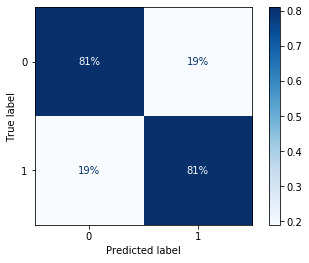

In [78]:
plot_confusion_matrix(dt, X_test, y_test, values_format= '.0%', normalize='true', cmap= "Blues",)

## Random Forest

In [79]:
#RANDOM FOREST 

from sklearn.ensemble import RandomForestClassifier
#call the model
model = RandomForestClassifier(n_estimators=100, random_state=0)
#train the model
model.fit(X_train,y_train)
#cross validate it
cross_valid_acc_2 = np.mean(cross_val_score(model,X_train,y_train, cv=5))

print("Cross-Validation Score: ", cross_valid_acc_2)

# Finally evaluate on test
y_pred_RF=model.predict(X_test)
test_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_RF)
print ("Test Accuracy: {:.3f}".format(test_accuracy) )


Cross-Validation Score:  0.7862019914651494
Test Accuracy: 0.745


## Feature Selection

In [80]:
model.feature_importances_


array([0.04355218, 0.04703106, 0.00124782, 0.05306407, 0.03173283,
       0.08261044, 0.07728462, 0.03699491, 0.04763853, 0.05306852,
       0.04725075, 0.06951627, 0.07883489, 0.00108995, 0.0045869 ,
       0.0037699 , 0.00549287, 0.00340642, 0.0110503 , 0.00164474,
       0.00548218, 0.00275893, 0.01531858, 0.00643454, 0.01741123,
       0.05487991, 0.00204569, 0.001878  , 0.09449232, 0.00654951,
       0.00366731, 0.00732391, 0.04412195, 0.02859994, 0.00614318,
       0.00202484])

Text(0.5, 1.0, 'Feature Importances')

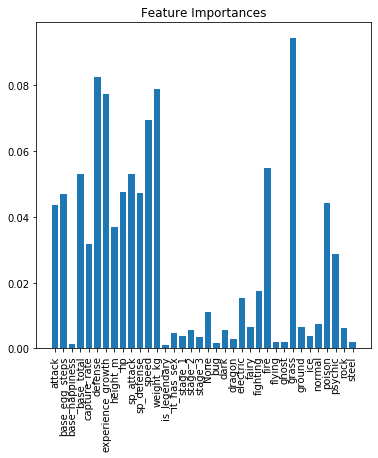

In [81]:
fig, ax = plt.subplots(figsize=(6,6))

# create a barplot with xaxis having the feature number, the yaxis have the index of importance
ax.bar(X.columns, model.feature_importances_)
ax.set_xticklabels(X.columns,rotation = "vertical")
ax.set_title("Feature Importances")

In [82]:

# calculate the mean squared error so to understand how many features should we maintain in our dataframe
best_features = np.argsort(model.feature_importances_)[::-1]# order best features from best to worst

rmse = []

for f in range(1,len(best_features)+1):
    rf_small = RandomForestClassifier(n_estimators=100, random_state=0)
    # change update ... 
    scores = cross_val_score(rf_small, 
                             X_train[:,best_features[:f]], y_train, 
                             cv=5, scoring='neg_mean_squared_error')
    rmse += [-scores.mean()]

Full score: 0.20298719772403984
Best score: 0.17069701280227595


Text(0.5, 0, 'Number of Best features used')

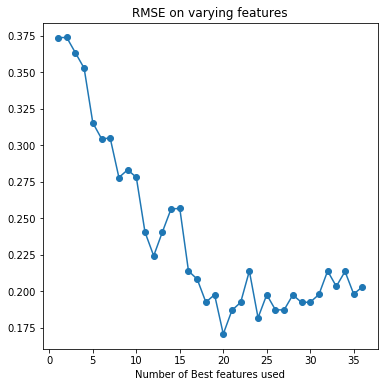

In [83]:
# plot the MSE correlated to the number of features applied
print ("Full score:", rmse[-1])
print ("Best score:", min(rmse))

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(range(1,len(best_features)+1), rmse, 'o-', label="RMSE")
ax.set_title("RMSE on varying features")
ax.set_xlabel("Number of Best features used")

## Recursive Feature Elimination Cross Validation

In [84]:
from sklearn.feature_selection import RFECV

rf_small = RandomForestClassifier(n_estimators=100, random_state=0)
rfecv = RFECV(rf_small, 
                 step=1, # features removed at each step
            
                cv=5, scoring="accuracy")
rfecv.fit(X_train,y_train)
print("Optimal number of features: ", rfecv.n_features_)
column_names = X.columns[rfecv.support_]

print("Best features: ", column_names)

Optimal number of features:  22
Best features:  Index(['attack', 'base_egg_steps', 'base_total', 'capture_rate', 'defense',
       'experience_growth', 'height_m', 'hp', 'sp_attack', 'sp_defense',
       'speed', 'weight_kg', 'it_has_sex', 'stage_1', 'None', 'electric',
       'fighting', 'fire', 'grass', 'ground', 'poison', 'psychic'],
      dtype='object')


In [85]:
 rfecv.ranking_

array([ 1,  1, 14,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 15,  1,  1,  4,
        6,  1, 13,  5,  7,  1,  8,  1,  1,  9, 10,  1,  1, 12,  2,  1,  1,
        3, 11])

In [86]:
print("test accuracy score is: {:.3f}".format(accuracy_score(y_true=y_test,y_pred=rfecv.predict(X_test))))

test accuracy score is: 0.723


In [87]:
X_train_rfecv = rfecv.transform(X_train)
X_test_rfecv = rfecv.transform(X_test)

In [88]:
X_train_rfecv = pd.DataFrame(X_train_rfecv, columns=column_names)

In [89]:
X_test_rfecv = pd.DataFrame(X_test_rfecv, columns=column_names)

### let's try a second round
### let's see if there are other features that might not actually be helpful

In [90]:
rf_small = RandomForestClassifier(n_estimators=100, random_state=0)
rfecv2 = RFECV(rf_small, 
                 step=1, # features removed at each step
                cv=5, scoring="accuracy")
rfecv2.fit(X_train_rfecv,y_train)
print("Optimal number of features: ", rfecv2.n_features_)

Optimal number of features:  22


In [91]:
print("Best features: ", X_train_rfecv.columns[rfecv2.support_])

Best features:  Index(['attack', 'base_egg_steps', 'base_total', 'capture_rate', 'defense',
       'experience_growth', 'height_m', 'hp', 'sp_attack', 'sp_defense',
       'speed', 'weight_kg', 'it_has_sex', 'stage_1', 'None', 'electric',
       'fighting', 'fire', 'grass', 'ground', 'poison', 'psychic'],
      dtype='object')


In [92]:
rfecv2_acc = accuracy_score(y_true=y_test,y_pred=rfecv2.predict(X_test_rfecv))
print("test accuracy score is: {:.3f}".format(rfecv2_acc))

test accuracy score is: 0.723


In [93]:
X_train_rfecv_2 = rfecv2.transform(X_train_rfecv)
X_test_rfecv_2 = rfecv2.transform(X_test_rfecv)

In [94]:
column_names_2= X_train_rfecv.columns[rfecv2.support_]

In [95]:
X_train_rfecv_2 = pd.DataFrame(X_train_rfecv_2, columns=column_names_2)

In [96]:
X_test_rfecv_2 = pd.DataFrame(X_test_rfecv_2, columns=column_names_2)

In [97]:
results["RF"] = rfecv2_acc

## Decision Tree - second try after feature selection

In [98]:
accuracies = []

for max_leaves in range(2,50,2):
    cnt = (max_leaves//2)-1
    # train and predict
    dt2 = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaves)
    dt2.fit(X_train_rfecv_2,y_train)

    accuracies +=[[np.mean(cross_val_score(dt2,X_train_rfecv_2,y_train, cv=5)), max_leaves]]
    
    print ("Leaves:",max_leaves," - Cross-Validation Accuracy: ",accuracies[cnt][0])
print()

#print(accuracies)
best_accuracy, best_max_leaves = max(accuracies)
print ( "Best Max Leaves", best_max_leaves )


dt2 = tree.DecisionTreeClassifier(max_leaf_nodes=best_max_leaves)
dt2.fit(X_train_rfecv_2,y_train)

y_prediction_trees=dt2.predict(X_test_rfecv_2)
test_acc = accuracy_score(y_true=y_test, y_pred=y_prediction_trees)
print ("Test Accuracy: {:.3f}".format(test_acc) )

Leaves: 2  - Cross-Validation Accuracy:  0.5994310099573257
Leaves: 4  - Cross-Validation Accuracy:  0.7007112375533429
Leaves: 6  - Cross-Validation Accuracy:  0.7972972972972973
Leaves: 8  - Cross-Validation Accuracy:  0.861877667140825
Leaves: 10  - Cross-Validation Accuracy:  0.8295874822190612
Leaves: 12  - Cross-Validation Accuracy:  0.807823613086771
Leaves: 14  - Cross-Validation Accuracy:  0.8238975817923186
Leaves: 16  - Cross-Validation Accuracy:  0.8403982930298721
Leaves: 18  - Cross-Validation Accuracy:  0.8402560455192034
Leaves: 20  - Cross-Validation Accuracy:  0.8183499288762446
Leaves: 22  - Cross-Validation Accuracy:  0.82375533428165
Leaves: 24  - Cross-Validation Accuracy:  0.8079658605974395
Leaves: 26  - Cross-Validation Accuracy:  0.8129445234708392
Leaves: 28  - Cross-Validation Accuracy:  0.8345661450924607
Leaves: 30  - Cross-Validation Accuracy:  0.8187766714082503
Leaves: 32  - Cross-Validation Accuracy:  0.8452347083926032
Leaves: 34  - Cross-Validation A

In [99]:
cross_val_score(dt2,X_train_rfecv_2,y_train, cv=5)

array([0.73684211, 0.81578947, 0.89189189, 0.89189189, 0.97297297])

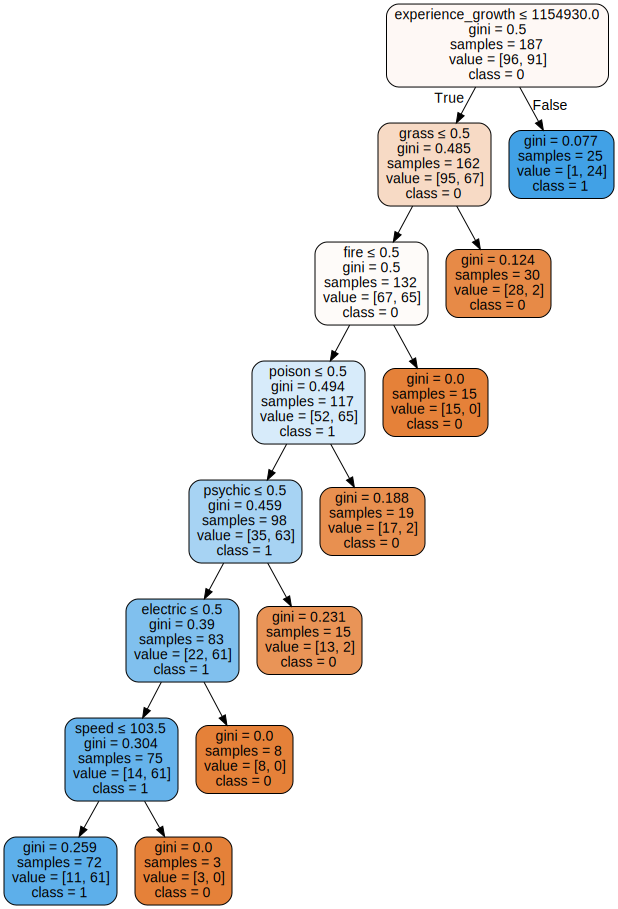

In [100]:
# GRAPHIC REPRESENTATION OF THE TREE

feat_names = X_test_rfecv_2.columns

c_names = ["0","1"]

dot_data = tree.export_graphviz(dt2, out_file=None, 
                                feature_names=feat_names, class_names=c_names,  
                                filled=True, rounded=True, special_characters=True)  


graph = graphviz.Source(dot_data)
graph

In [101]:
results["DT"] = test_acc

## Displaying Bias and Variance

In [102]:
#displaying errors


N_TESTS = 20

stats = np.array([])

n_leaves = range(2,100,2)

for l in n_leaves:
    y_preds = np.array([])
    
    for i in range(N_TESTS):
        Xs, ys = resample(X_train_rfecv_2,y_train, n_samples=int(0.67*len(y_train)) )

        
        dt_err = DecisionTreeClassifier(max_leaf_nodes=l)
        dt_err.fit(Xs,ys)
        
        y_pred = dt_err.predict(X_train_rfecv_2)
        y_preds = np.column_stack( [y_preds, y_pred] ) if y_preds.size else y_pred

    # actual y vs. avg prediction
    dt_bias     = (y_train-np.mean(y_preds,axis=1))**2
    # variance of predictions
    dt_variance = np.var(y_preds,axis=1)
    # MSE error 
    dt_error    = (y_preds - y_train.reshape(-1,1))**2
    
    run_stats = np.array([dt_error.mean(), dt_bias.mean(), dt_variance.mean()])
    
    stats = np.column_stack( [stats, run_stats]) if stats.size else run_stats
 

[0.14197861 0.03389037 0.10808824]


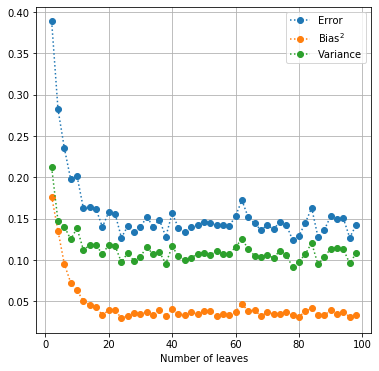

In [103]:
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(n_leaves,stats[0,:], 'o:', label='Error')
ax.plot(n_leaves,stats[1,:], 'o:', label='Bias$^2$')
ax.plot(n_leaves,stats[2,:], 'o:', label='Variance')
ax.set_xlabel('Number of leaves')
ax.grid()
ax.legend()

print (stats[:,-1])

## Bagging application for Bias Reduction

[0.33449198 0.18049465 0.15399733]


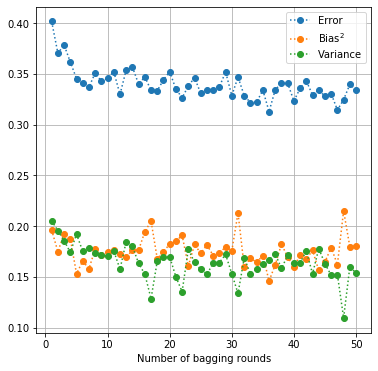

In [104]:
N_TESTS = 20

stats = np.array([])

bags = range(1,51)
for l in bags:
    y_preds = np.array([])
    
    for i in range(N_TESTS):
        Xs, ys = resample(X_train_rfecv_2,y_train, n_samples=int(0.67*len(y_train)) )

        # train a decision tree classifier
        dt = tree.DecisionTreeClassifier(max_leaf_nodes=2)
        # apply the bagging model on the decision tree
        bagging = BaggingClassifier(dt, n_estimators=l)
        #train the model
        bagging.fit(Xs,ys)
        
        y_pred = bagging.predict(X_train_rfecv_2)
        y_preds = np.column_stack( [y_preds, y_pred] ) if y_preds.size else y_pred

    dt_bias     = (y_train-np.mean(y_preds,axis=1))**2
    dt_variance = np.var(y_preds,axis=1)
    dt_error    = (y_preds - y_train.reshape(-1,1))**2
    
    run_stats = np.array([dt_error.mean(), dt_bias.mean(), dt_variance.mean()])
    
    stats = np.column_stack( [stats, run_stats]) if stats.size else run_stats
    
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(bags,stats[0,:], 'o:', label='Error')
ax.plot(bags,stats[1,:], 'o:', label='Bias$^2$')
ax.plot(bags,stats[2,:], 'o:', label='Variance')
ax.set_xlabel('Number of bagging rounds')
ax.grid()
ax.legend()

print (stats[:,-1])

## Decision Tree - final try after bagging

In [105]:
# then we apply predict our labels with the bagging model
accuracies = []

for max_leaves in range(2,50,2):
    cnt = (max_leaves//2)-1
    # train t
    dt = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaves)
    #apply bagging
    bagging = BaggingClassifier(dt, n_estimators=50)
    bagging.fit(X_train_rfecv_2,y_train)

    # compute Accuracy
    cross_val_score_bag = np.mean(cross_val_score(bagging,X_train_rfecv_2,y_train, cv=5))



    accuracies +=[[cross_val_score_bag, max_leaves]]
    
    print ("Leaves:",max_leaves," - Validation Accuracy: ",accuracies[cnt][0])
print()

#print(accuracies)
best_accuracy, best_max_leaves = max(accuracies)
print ( "Best Max Leaves", best_max_leaves )


dt = tree.DecisionTreeClassifier(max_leaf_nodes=best_max_leaves)
bagging = BaggingClassifier(dt, n_estimators=50)
bagging.fit(X_train_rfecv_2,y_train)

bag_pred = accuracy_score(y_true=y_test, y_pred=bagging.predict(X_test_rfecv_2))

print ("Test Accuracy: {:.3f}".format(bag_pred) )

Leaves: 2  - Validation Accuracy:  0.6584637268847795
Leaves: 4  - Validation Accuracy:  0.7650071123755335
Leaves: 6  - Validation Accuracy:  0.7702702702702704
Leaves: 8  - Validation Accuracy:  0.8240398293029871
Leaves: 10  - Validation Accuracy:  0.8294452347083926
Leaves: 12  - Validation Accuracy:  0.8079658605974395
Leaves: 14  - Validation Accuracy:  0.8342816500711239
Leaves: 16  - Validation Accuracy:  0.8183499288762446
Leaves: 18  - Validation Accuracy:  0.82375533428165
Leaves: 20  - Validation Accuracy:  0.834566145092461
Leaves: 22  - Validation Accuracy:  0.82375533428165
Leaves: 24  - Validation Accuracy:  0.8401137980085348
Leaves: 26  - Validation Accuracy:  0.8288762446657184
Leaves: 28  - Validation Accuracy:  0.8344238975817924
Leaves: 30  - Validation Accuracy:  0.8452347083926032
Leaves: 32  - Validation Accuracy:  0.7758179231863442
Leaves: 34  - Validation Accuracy:  0.7917496443812233
Leaves: 36  - Validation Accuracy:  0.85049786628734
Leaves: 38  - Validat

In [106]:
results["bag"] = bag_pred

## SCALING OUR DATAFRAME
## MinMaxScaler function will be used to scale our features before fitting the data into the next classifier prediction models I will implement

In [107]:
scaler = mms()

scaler.fit(X_train_rfecv_2,y_train)

scaled_train = scaler.transform(X_train_rfecv_2)
scaled_test =  scaler.transform(X_test_rfecv_2)

## LOGISTIC REGRESSION

In [108]:

lgr = LogisticRegression(solver="liblinear") # the liblinear solver is used because it fits better for smaller datasets, as the Scikit-Learn documentation suggests

#fit the model
lgr.fit(scaled_train, y_train)

# cross-validate
cross_valid_acc_lgr = np.mean(cross_val_score(lgr,X_train_rfecv_2,y_train, cv=5))

print("Cross-validation accuracy score: {:.3f}".format(cross_valid_acc_lgr))

# Finally evaluate on test
lgr_pred =  accuracy_score(y_test,lgr.predict(scaled_test))

print("Test Accuracy Score: ",lgr_pred)

Cross-validation accuracy score: 0.679
Test Accuracy Score:  0.8085106382978723


In [109]:
results ["LR"] = lgr_pred

## KNN

In [110]:

best_neighbour = []
for k in range(1,100,3): # with this cycle, we will discover what number of neighbours is best fit for the prediction
                        # of our test dataset
    kNN = KNeighborsClassifier(n_neighbors=k) # specify the number of neighbours considered
    # train the model
    kNN.fit(scaled_train ,y_train)
    # Cross-validate the model
    cross_valid_acc_knn = np.mean(cross_val_score(kNN,scaled_train,y_train, cv=5))
    print("k:", k, "Cross-validation accuracy score: {:.3f}".format(cross_valid_acc_knn))
    best_neighbour += [[cross_valid_acc_knn,k]]

print()
best_k = max(best_neighbour)[1] # it stores the best number of neighbours
print ( "Best k neighbours", best_max_leaves )

kNN = KNeighborsClassifier(n_neighbors=best_k)
kNN.fit(scaled_train ,y_train)

k_pred = kNN.predict( scaled_test )

print()
    # compute Accuracy
KNN_pred = accuracy_score(y_true=y_test, y_pred=k_pred)
print ("Test Accuracy:{:.3f}".format(KNN_pred) ) 
    
    

k: 1 Cross-validation accuracy score: 0.759
k: 4 Cross-validation accuracy score: 0.787
k: 7 Cross-validation accuracy score: 0.766
k: 10 Cross-validation accuracy score: 0.771
k: 13 Cross-validation accuracy score: 0.685
k: 16 Cross-validation accuracy score: 0.722
k: 19 Cross-validation accuracy score: 0.648
k: 22 Cross-validation accuracy score: 0.653
k: 25 Cross-validation accuracy score: 0.573
k: 28 Cross-validation accuracy score: 0.588
k: 31 Cross-validation accuracy score: 0.594
k: 34 Cross-validation accuracy score: 0.642
k: 37 Cross-validation accuracy score: 0.626
k: 40 Cross-validation accuracy score: 0.631
k: 43 Cross-validation accuracy score: 0.615
k: 46 Cross-validation accuracy score: 0.632
k: 49 Cross-validation accuracy score: 0.599
k: 52 Cross-validation accuracy score: 0.620
k: 55 Cross-validation accuracy score: 0.583
k: 58 Cross-validation accuracy score: 0.567
k: 61 Cross-validation accuracy score: 0.551
k: 64 Cross-validation accuracy score: 0.535
k: 67 Cross-v

In [111]:
results["KNN"] = KNN_pred

## Support Vector Machine

In [112]:

best_C = []
for C in [0.01,0.1,1,10,100,1000,10000]:# we need to check which value of C is best fit for the model hyperparameter
    svc = SVC(C=C,gamma="auto") 
    #fit the model
    svc.fit(scaled_train,y_train)
    # cross validate it
    cross_valid_acc_svc = np.mean(cross_val_score(svc,scaled_train,y_train, cv=5))
    # Finally evaluate on test
    print("Cross-validation accuracy score: {:.3f}".format(cross_valid_acc_svc))
    best_C +=[[cross_valid_acc_svc,C]]

Cross-validation accuracy score: 0.513
Cross-validation accuracy score: 0.513
Cross-validation accuracy score: 0.835
Cross-validation accuracy score: 0.867
Cross-validation accuracy score: 0.862
Cross-validation accuracy score: 0.840
Cross-validation accuracy score: 0.798


In [113]:
C = max(best_C)[1]# store the best value of C
# compute the prediction
svc = SVC(C=C,gamma="auto")
svc.fit(scaled_train,y_train)
svc_pred = accuracy_score(y_true=y_test, y_pred=svc.predict(scaled_test))    
print ("Accuracy:", svc_pred )
print('Best C:', C)

Accuracy: 0.7872340425531915
Best C: 10


In [114]:
results["SVM"] = svc_pred

# FINAL RESULTS - NearMiss


In [115]:
print("These are the following results of the project with NearMiss:")
print()
print("Decision Tree accuracy after getting rid of underperforming features: ", results["DT"],  )
print("Random Forest: ", results["RF"],  )
print("Bagging: ", results["bag"],  )
print("Logistic Regression: ", results["LR"],  )
print("KNN ", results["KNN"],  )
print("Support Vector Machine: ", results["SVM"],  )
print()

These are the following results of the project:

Decision Tree accuracy after getting rid of underperforming features:  0.8085106382978723
Random Forest:  0.723404255319149
Bagging:  0.7872340425531915
Logistic Regression:  0.8085106382978723
KNN  0.8085106382978723
Support Vector Machine:  0.7872340425531915



# BALANCING WITH SMOTE

In [116]:
y=pk_df['water']
X=pk_df.drop('water',axis=1, )


In [117]:
smote = SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_sample(X,y)


C:\Users\leona\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [118]:
y_sm.shape

(1184,)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [120]:
# instead of splitting the dataset into train and validate, I used the cross-validation function cross_val_score in order
# to compute an even more accurate validation score, applying 5 different validations to the dataset
accuracies = []

for max_leaves in range(2,50,2): 
    cnt = (max_leaves//2)-1
    # train and predict
    dt = DecisionTreeClassifier(max_leaf_nodes=max_leaves)


    # compute Accuracy

    cross_valid_acc = np.mean(cross_val_score(dt,X_train,y_train, cv=5))


    accuracies +=[[cross_valid_acc, max_leaves]]
    
    print ("Leaves:",max_leaves," - Cross-Validation Accuracy: ",accuracies[cnt][0])
print()

#print(accuracies)
best_accuracy, best_max_leaves = max(accuracies)
print ( "Best Max Leaves", best_max_leaves )

# here we are using both training and validation,
# to exploit the most quantity of data
dt = DecisionTreeClassifier(max_leaf_nodes=best_max_leaves)
dt.fit(X_train,y_train)

# evaluate on test
y_prediction_trees=dt.predict(X_test)
test_acc = accuracy_score(y_true=y_test, y_pred=y_prediction_trees)
print ("Test Accuracy: {:.3f}".format(test_acc) )

Leaves: 2  - Cross-Validation Accuracy:  0.5776274018379282
Leaves: 4  - Cross-Validation Accuracy:  0.6620885547201337
Leaves: 6  - Cross-Validation Accuracy:  0.7582121971595656
Leaves: 8  - Cross-Validation Accuracy:  0.8173099415204679
Leaves: 10  - Cross-Validation Accuracy:  0.8637816764132553
Leaves: 12  - Cross-Validation Accuracy:  0.8933611807296018
Leaves: 14  - Cross-Validation Accuracy:  0.9060595934280145
Leaves: 16  - Cross-Validation Accuracy:  0.9028905597326649
Leaves: 18  - Cross-Validation Accuracy:  0.9113227513227514
Leaves: 20  - Cross-Validation Accuracy:  0.9176496797549429
Leaves: 22  - Cross-Validation Accuracy:  0.9218880534670009
Leaves: 24  - Cross-Validation Accuracy:  0.9250570871623502
Leaves: 26  - Cross-Validation Accuracy:  0.9261097187412977
Leaves: 28  - Cross-Validation Accuracy:  0.9282261208576997
Leaves: 30  - Cross-Validation Accuracy:  0.9229685324422168
Leaves: 32  - Cross-Validation Accuracy:  0.9271790587580062
Leaves: 34  - Cross-Validati

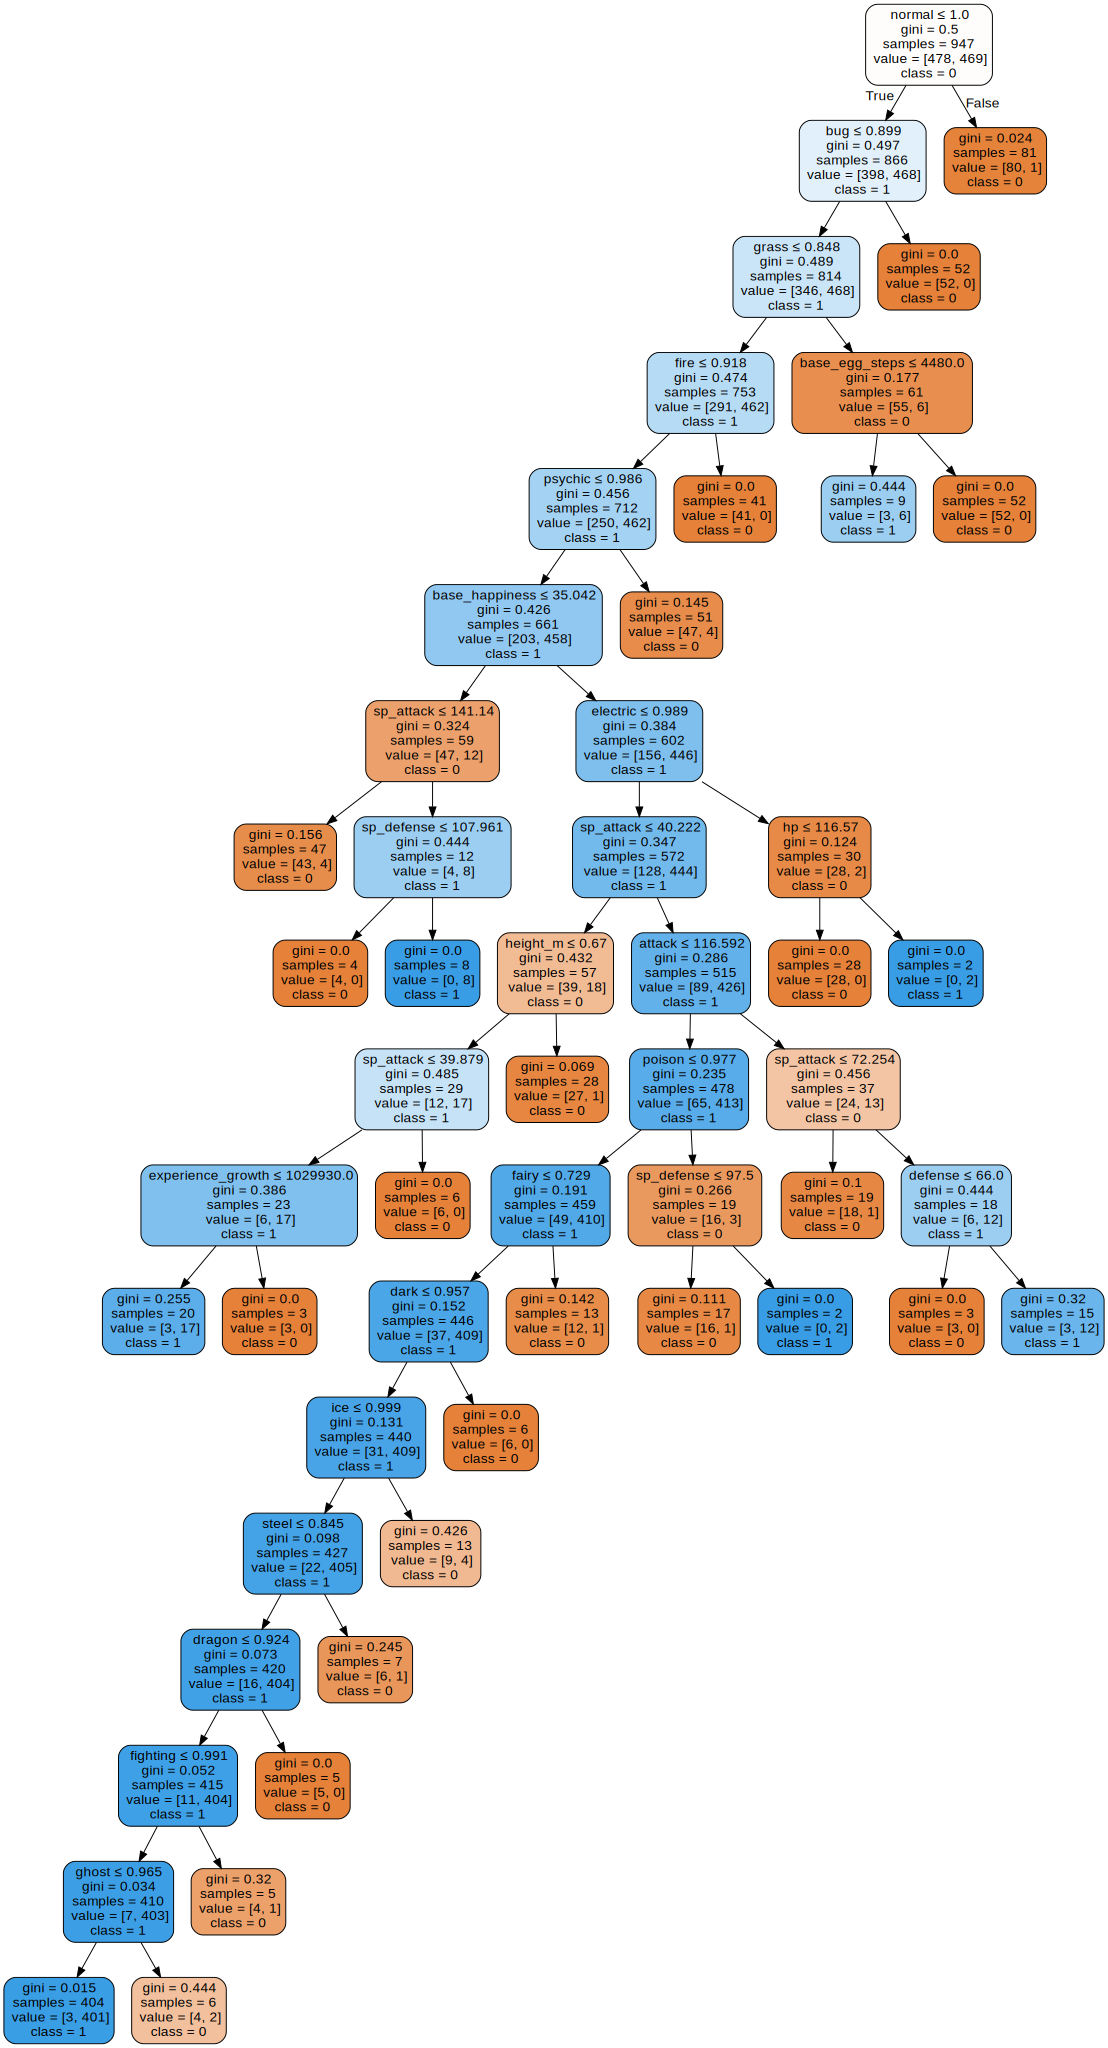

In [121]:
# GRAPHIC REPRESENTATION OF THE TREE

feat_names = X.columns

c_names = ["0","1"]

dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=feat_names, class_names=c_names,  
                                filled=True, rounded=True, special_characters=True)  



graph = graphviz.Source(dot_data)
graph

In [122]:
print(classification_report(y_test,y_prediction_trees))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       114
           1       0.89      0.85      0.87       123

    accuracy                           0.87       237
   macro avg       0.87      0.87      0.87       237
weighted avg       0.87      0.87      0.87       237



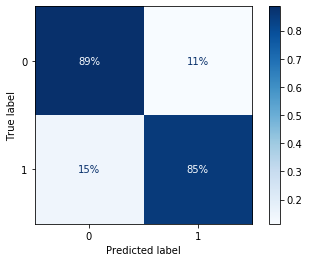

In [123]:
plot_confusion_matrix(dt, X_test, y_test, values_format= '.0%', normalize='true', cmap= "Blues",)

In [124]:
results["DT"] = test_acc

## Random Forest

In [148]:
#RANDOM FOREST 

from sklearn.ensemble import RandomForestClassifier
#call the model
model = RandomForestClassifier(n_estimators=100, random_state=0)
#train the model
model.fit(X_train,y_train)
#cross validate it
cross_valid_acc_2 = np.mean(cross_val_score(model,X_train,y_train, cv=5))

print("Cross-Validation Score: ", cross_valid_acc_2)

# Finally evaluate on test
y_pred_RF=model.predict(X_test)
test_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_RF)
print ("Test Accuracy: {:.3f}".format(test_accuracy) )


Cross-Validation Score:  0.9503870788081314
Test Accuracy: 0.949


## Feature Selection

In [126]:
model.feature_importances_


array([0.04838966, 0.02242136, 0.03318021, 0.02729777, 0.02133624,
       0.02692376, 0.01477266, 0.03887295, 0.02930177, 0.06905642,
       0.02702373, 0.06246722, 0.04600026, 0.0012555 , 0.00633057,
       0.00648978, 0.00668752, 0.00216041, 0.02640933, 0.03558048,
       0.01874332, 0.01505001, 0.03156427, 0.01418092, 0.01801398,
       0.05952202, 0.03348392, 0.00832393, 0.06092824, 0.02059564,
       0.01596846, 0.06790574, 0.02452856, 0.04329034, 0.00399579,
       0.01194726])

Text(0.5, 1.0, 'Feature Importances')

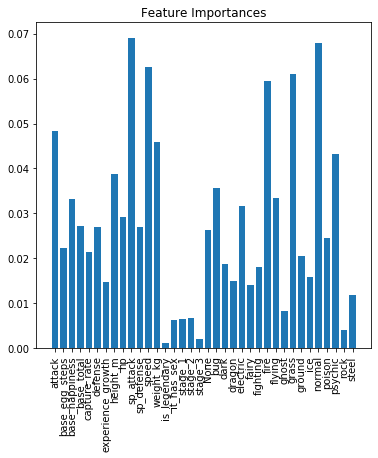

In [149]:
fig, ax = plt.subplots(figsize=(6,6))

# create a barplot with xaxis having the feature number, the yaxis have the index of importance
ax.bar(X.columns, model.feature_importances_)
ax.set_xticklabels(X.columns,rotation = "vertical")
ax.set_title("Feature Importances")

In [150]:

# calculate the mean squared error so to understand how many features should we maintain in our dataframe
best_features = np.argsort(model.feature_importances_)[::-1]# order best features from best to worst

rmse = []

for f in range(1,len(best_features)+1):
    rf_small = RandomForestClassifier(n_estimators=100, random_state=0)
    # change update ... 
    scores = cross_val_score(rf_small, 
                             X_train[:,best_features[:f]], y_train, 
                             cv=5, scoring='neg_mean_squared_error')
    rmse += [-scores.mean()]

Full score: 0.047502088554720136
Best score: 0.045385686438318015


Text(0.5, 0, 'Number of Best features used')

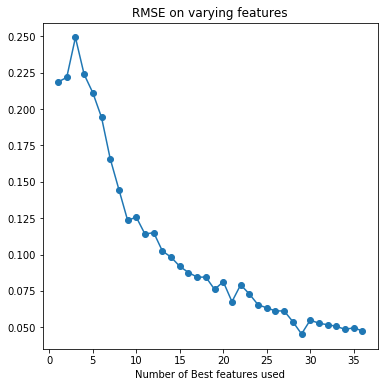

In [151]:
# plot the MSE correlated to the number of features applied
print ("Full score:", rmse[-1])
print ("Best score:", min(rmse))

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(range(1,len(best_features)+1), rmse, 'o-', label="RMSE")
ax.set_title("RMSE on varying features")
ax.set_xlabel("Number of Best features used")

## Recursive Feature Elimination Cross Validation

In [152]:
from sklearn.feature_selection import RFECV

rf_small = RandomForestClassifier(n_estimators=100, random_state=0)
rfecv = RFECV(rf_small, 
                 step=1, # features removed at each step
            
                cv=5, scoring="accuracy")
rfecv.fit(X_train,y_train)
print("Optimal number of features: ", rfecv.n_features_)
column_names = X.columns[rfecv.support_]

print("Best features: ", column_names)

Optimal number of features:  33
Best features:  Index(['attack', 'base_egg_steps', 'base_happiness', 'base_total',
       'capture_rate', 'defense', 'experience_growth', 'height_m', 'hp',
       'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'it_has_sex',
       'stage_1', 'stage_2', 'None', 'bug', 'dark', 'dragon', 'electric',
       'fairy', 'fighting', 'fire', 'flying', 'ghost', 'grass', 'ground',
       'ice', 'normal', 'poison', 'psychic', 'steel'],
      dtype='object')


In [158]:
rfecv.ranking_ 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1])

In [132]:
rfecv_acc = accuracy_score(y_true=y_test,y_pred=rfecv.predict(X_test))


In [133]:
print("test accuracy score is: {:.3f}".format(rfecv_acc))

test accuracy score is: 0.932


In [134]:
results["RF"] = rfecv_acc

## Displaying Bias and Variance

In [135]:
#displaying errors


N_TESTS = 20

stats = np.array([])

n_leaves = range(2,100,2)

for l in n_leaves:
    y_preds = np.array([])
    
    for i in range(N_TESTS):
        Xs, ys = resample(X_train,y_train, n_samples=int(0.67*len(y_train)) )

        
        dt_err = DecisionTreeClassifier(max_leaf_nodes=l)
        dt_err.fit(Xs,ys)
        
        y_pred = dt_err.predict(X_train)
        y_preds = np.column_stack( [y_preds, y_pred] ) if y_preds.size else y_pred

    # actual y vs. avg prediction
    dt_bias     = (y_train-np.mean(y_preds,axis=1))**2
    # variance of predictions
    dt_variance = np.var(y_preds,axis=1)
    # MSE error 
    dt_error    = (y_preds - y_train.reshape(-1,1))**2
    
    run_stats = np.array([dt_error.mean(), dt_bias.mean(), dt_variance.mean()])
    
    stats = np.column_stack( [stats, run_stats]) if stats.size else run_stats
 

[0.05702218 0.0129831  0.04403907]


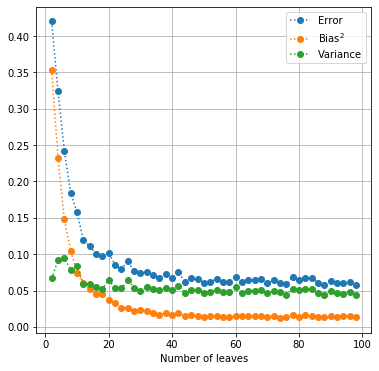

In [136]:
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(n_leaves,stats[0,:], 'o:', label='Error')
ax.plot(n_leaves,stats[1,:], 'o:', label='Bias$^2$')
ax.plot(n_leaves,stats[2,:], 'o:', label='Variance')
ax.set_xlabel('Number of leaves')
ax.grid()
ax.legend()

print (stats[:,-1])

## SCALING OUR DATAFRAME
## MinMaxScaler function will be used to scale our features before fitting the data into the next classifier prediction models I will implement

In [137]:
#from sklearn.preprocessing import StandardScaler as ss


In [138]:
scaler = mms()

scaler.fit(X_train,y_train)

scaled_train = scaler.transform(X_train)
scaled_test =  scaler.transform(X_test)

## LOGISTIC REGRESSION

In [139]:

lgr = LogisticRegression(solver="liblinear") # the liblinear solver is used because it fits better for smaller datasets, as the Scikit-Learn documentation suggests

#fit the model
lgr.fit(scaled_train, y_train)

# cross-validate
cross_valid_acc_lgr = np.mean(cross_val_score(lgr,X_train,y_train, cv=5))

print("Cross-validation accuracy score: {:.3f}".format(cross_valid_acc_lgr))

# Finally evaluate on test
lgr_pred =  accuracy_score(y_test,lgr.predict(scaled_test))

print("Test Accuracy Score: ",lgr_pred)

Cross-validation accuracy score: 0.777
Test Accuracy Score:  0.9915611814345991


In [140]:
results ["LR"] = lgr_pred

## KNN

In [160]:

best_neighbour = []
for k in range(1,100,3): # with this cycle, we will discover what number of neighbours is best fit for the prediction
                        # of our test dataset
    kNN = KNeighborsClassifier(n_neighbors=k) # specify the number of neighbours considered
    # train the model
    kNN.fit(scaled_train ,y_train)
    # Cross-validate the model
    cross_valid_acc_knn = np.mean(cross_val_score(kNN,scaled_train,y_train, cv=5))
    print("k:", k, "Cross-validation accuracy score: {:.3f}".format(cross_valid_acc_knn))
    best_neighbour += [[cross_valid_acc_knn,k]]

print()
best_k = max(best_neighbour)[1] # it stores the best number of neighbours
print ( "Best k neighbours", best_max_leaves )

kNN = KNeighborsClassifier(n_neighbors=best_k)
kNN.fit(scaled_train ,y_train)

k_pred = kNN.predict( scaled_test )

print()
    # compute Accuracy
KNN_pred = accuracy_score(y_true=y_test, y_pred=k_pred)
print ("Test Accuracy:{:.3f}".format(KNN_pred) ) 
    
    

k: 1 Cross-validation accuracy score: 0.860
k: 4 Cross-validation accuracy score: 0.787
k: 7 Cross-validation accuracy score: 0.706
k: 10 Cross-validation accuracy score: 0.701
k: 13 Cross-validation accuracy score: 0.664
k: 16 Cross-validation accuracy score: 0.656
k: 19 Cross-validation accuracy score: 0.626
k: 22 Cross-validation accuracy score: 0.628
k: 25 Cross-validation accuracy score: 0.607
k: 28 Cross-validation accuracy score: 0.612
k: 31 Cross-validation accuracy score: 0.608
k: 34 Cross-validation accuracy score: 0.628
k: 37 Cross-validation accuracy score: 0.618
k: 40 Cross-validation accuracy score: 0.627
k: 43 Cross-validation accuracy score: 0.610
k: 46 Cross-validation accuracy score: 0.605
k: 49 Cross-validation accuracy score: 0.590
k: 52 Cross-validation accuracy score: 0.585
k: 55 Cross-validation accuracy score: 0.579
k: 58 Cross-validation accuracy score: 0.574
k: 61 Cross-validation accuracy score: 0.562
k: 64 Cross-validation accuracy score: 0.559
k: 67 Cross-v

In [142]:
results["KNN"] = KNN_pred

## Support Vector Machine

In [143]:

best_C = []
for C in [0.01,0.1,1,10,100,1000,10000]:# we need to check which value of C is best fit for the model hyperparameter
    svc = SVC(C=C,gamma="auto") 
    #fit the model
    svc.fit(scaled_train,y_train)
    # cross validate it
    cross_valid_acc_svc = np.mean(cross_val_score(svc,scaled_train,y_train, cv=5))
    # Finally evaluate on test
    print("Cross-validation accuracy score: {:.3f}".format(cross_valid_acc_svc))
    best_C +=[[cross_valid_acc_svc,C]]

Cross-validation accuracy score: 0.505
Cross-validation accuracy score: 0.505
Cross-validation accuracy score: 0.957
Cross-validation accuracy score: 0.995
Cross-validation accuracy score: 0.995
Cross-validation accuracy score: 0.994
Cross-validation accuracy score: 0.988


In [159]:
C = max(best_C)[1]# store the best value of C
# compute the prediction
svc = SVC(C=C,gamma="auto")
svc.fit(scaled_train,y_train)
svc_pred = accuracy_score(y_true=y_test, y_pred=svc.predict(scaled_test))    
print ("Accuracy:", svc_pred )
print('Best C:', C)

Accuracy: 0.9915611814345991
Best C: 100


In [145]:
results["SVM"] = svc_pred

# FINAL RESULTS


In [162]:
print("These are the following results of the project after the implementatio of SMOTE:")
print()
print("Decision Tree accuracy: ", results["DT"],  )
print("Random Forest: ", results["RF"],  )
print("Logistic Regression: ", results["LR"],  )
print("KNN ", results["KNN"],  )
print("Support Vector Machine: ", results["SVM"],  )
print()

These are the following results of the project after the implementatio of SMOTE:

Decision Tree accuracy:  0.869198312236287
Random Forest:  0.9324894514767933
Logistic Regression:  0.9915611814345991
KNN  0.8607594936708861
Support Vector Machine:  0.9915611814345991

